In [65]:
import pandas as pd
import numpy as np

X_train = pd.read_csv('../data/cve_2018-2020_X_train.csv')
y_train = pd.read_csv('../data/cve_2018-2020_y_train.csv')

X_test = pd.read_csv('../data/cve_2018-2020_X_test.csv')
y_test = pd.read_csv('../data/cve_2018-2020_y_test.csv')

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train['cvssV3_baseSeverity'].value_counts(dropna=False) / y_train.shape[0])
print(y_test['cvssV3_baseSeverity'].value_counts(dropna=False) / y_test.shape[0])
print(X_train.info())
print(y_train.info())

(22963, 2)
(22963, 2)
(22963, 16)
(22963, 16)
HIGH        0.434177
MEDIUM      0.401951
CRITICAL    0.146627
LOW         0.017245
Name: cvssV3_baseSeverity, dtype: float64
HIGH        0.434133
MEDIUM      0.401907
CRITICAL    0.146671
LOW         0.017289
Name: cvssV3_baseSeverity, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22963 entries, 0 to 22962
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CVE_ID       22963 non-null  object
 1   Description  22963 non-null  object
dtypes: object(2)
memory usage: 358.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22963 entries, 0 to 22962
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cvssV3_vectorString           22963 non-null  object 
 1   cvssV3_attackVector           22963 non-null  object 
 2   cvssV3_attackComplexity       229

In [66]:
true_cvss_vector_strings_fold1 = list(y_test['cvssV3_vectorString'])
true_cvss_vector_strings_fold2 = list(y_train['cvssV3_vectorString'])

true_cvss_vector_strings = true_cvss_vector_strings_fold1 + true_cvss_vector_strings_fold2

print(true_cvss_vector_strings[1])

true_base_scores = list(y_test['cvssV3_baseScore']) + list(y_train['cvssV3_baseScore'])
print(true_base_scores[:10])
len(true_base_scores)

CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
[5.4, 9.8, 5.4, 5.5, 5.3, 7.8, 9.8, 7.8, 9.8, 9.8]


45926

In [67]:
#import re

#true_cvss_vector_strings = [re.sub(r'^.*?/AV', 'AV', i) for i in true_cvss_vector_strings]

In [68]:
print(len(true_cvss_vector_strings))
true_cvss_vector_strings

45926


['CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N',
 'CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N',
 'CVSS:3.0/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:N/A:N',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N',
 'CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H',
 'CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.0/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:L/AC:H/PR:L/UI:R/S:C/C:L/I:L/A:L',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H',
 'CVSS:3.0/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:C/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H',
 'CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H',
 'CVSS:3.0/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:A/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H',
 'CVSS:3.1/AV:L/AC:L/PR:H/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.0/AV:N/AC:H/PR:N/UI:N/S:U/C:H/I:N/A:N',
 'CVSS:3.1/AV:N/AC:L

In [69]:
import pickle

pred_all_dict = {}
for metric in ['Attack_Vector', 'Attack_Complexity', 'Privileges_Required', 'User_Interaction', \
'Scope', 'Confidentiality_Impact', 'Integrity_Impact', 'Availability_Impact']:
    pred_fold_dict = {}
    for fold in ["fold1", "fold2"]:
        with open(metric+"/"+fold+"/"+metric.lower()+"_predicted_labels_char.txt", "rb") as f:
            pred_fold_dict[fold] = pickle.load(f)
    pred_all_dict[metric] = pred_fold_dict["fold1"] + pred_fold_dict["fold2"]

for key, item in pred_all_dict.items():
    print(key, len(item))
pred_all_dict

Attack_Vector 45926
Attack_Complexity 45926
Privileges_Required 45926
User_Interaction 45926
Scope 45926
Confidentiality_Impact 45926
Integrity_Impact 45926
Availability_Impact 45926


{'Attack_Vector': ['NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'LOCAL',
  'NETWORK',
  'LOCAL',
  'LOCAL',
  'NETWORK',
  'LOCAL',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'LOCAL',
  'NETWORK',
  'LOCAL',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'LOCAL',
  'NETWORK',
  'NETWORK',
  'LOCAL',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'LOCAL',
  'NETWORK',
  'NETWORK',
  'LOCAL',
  'NETWORK',
  'NETWORK',
  'LOCAL',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'LOCAL',
  'NETWORK',
  'LOCAL',
  'LOCAL',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'LOCAL',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'NETWORK',
  'LOCAL',
  'ADJACENT_NETWORK',
  'NETWORK',
  'NETWORK',
  'LO

In [70]:
AV_pred = pred_all_dict['Attack_Vector']
AC_pred = pred_all_dict['Attack_Complexity']
PR_pred = pred_all_dict['Privileges_Required']
UI_pred = pred_all_dict['User_Interaction']
S_pred = pred_all_dict['Scope']
C_pred = pred_all_dict['Confidentiality_Impact']
I_pred = pred_all_dict['Integrity_Impact']
A_pred = pred_all_dict['Availability_Impact']

In [71]:
def cvss_vector_string_reconstruction_from_predictions(AV, AC, PR, UI, S, C, I, A):
    predicted_vector_strings = []
    for i in range(0, len(AV)):
        vector_string = "CVSS:3.1/AV:"+AV[i][0]+"/AC:"+AC[i][0]+"/PR:"+PR[i][0]+"/UI:"+UI[i][0]+"/S:"+S[i][0]+"/C:"+C[i][0]+"/I:"+I[i][0]+"/A:"+A[i][0]
        predicted_vector_strings.append(vector_string)
        
    return predicted_vector_strings

In [72]:
#i=0
#"AV:"+AV_pred[i][0]+"/AC:"+AC_pred[i][0]+"/PR:"+PR_pred[i][0]+"/UI:"+UI_pred[i][0]+"/S:"+S_pred[i][0]+"/C:"+C_pred[i][0]+"/I:"+I_pred[i][0]+"/A:"+A_pred[i][0]

In [73]:
predicted_cvss_vector_strings = cvss_vector_string_reconstruction_from_predictions(AV_pred, AC_pred, PR_pred, UI_pred, S_pred, C_pred, I_pred, A_pred)

In [85]:
print(len(predicted_cvss_vector_strings))
predicted_cvss_vector_strings
#predicted_cvss_vector_strings = [i[:9]+j for i, j in zip(true_cvss_vector_strings, predicted_cvss_vector_strings)]

45926


['CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N',
 'CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:N/A:N',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:N',
 'CVSS:3.1/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:N/A:N',
 'CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:H/A:N',
 'CVSS:3.1/AV:L/AC:H/PR:L/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:C/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H',
 'CVSS:3.1/AV:L/AC:L/PR:H/UI:N/S:U/C:H/I:H/A:H',
 'CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:N/A:N',
 'CVSS:3.1/AV:N/AC:L

In [86]:
i = 3
print(true_cvss_vector_strings[i])
print(predicted_cvss_vector_strings[i])

CVSS:3.0/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:N/A:N
CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:N/A:N


In [87]:
len(predicted_cvss_vector_strings)

45926

A CVSS vector consist of 8 base metrics (AV, AC, PR, UI, S, C, I, A). Determine the number of wrong predicted metric values for each vulnerability.

In [88]:
import re

def number_of_wrong_categories(true_cvss_vector, predicted_cvss_vector):
    true_cvss_vector = re.sub(r'^.*?/AV', 'AV', true_cvss_vector)
    predicted_cvss_vector = re.sub(r'^.*?/AV', 'AV', predicted_cvss_vector)
    
    count = sum(1 for a, b in zip(true_cvss_vector, predicted_cvss_vector) if a != b)
    return count
    

In [89]:
number_of_errors_per_vector = [ number_of_wrong_categories(a, b) for a, b in zip(true_cvss_vector_strings, predicted_cvss_vector_strings)]

In [90]:
print(number_of_errors_per_vector[:100])

[0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 5, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 3, 0, 3, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1]


In [92]:
error_cat = list(range(0, 9))
num_errors_per_cat = [ sum([i==j for i in number_of_errors_per_vector]) for j in error_cat]

print(error_cat)
print(num_errors_per_cat)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[25176, 11580, 5643, 2400, 856, 222, 45, 4, 0]


In [93]:
from collections import Counter

occurence_count = Counter(number_of_errors_per_vector)
occurence_count.most_common(10)

[(0, 25176),
 (1, 11580),
 (2, 5643),
 (3, 2400),
 (4, 856),
 (5, 222),
 (6, 45),
 (7, 4)]

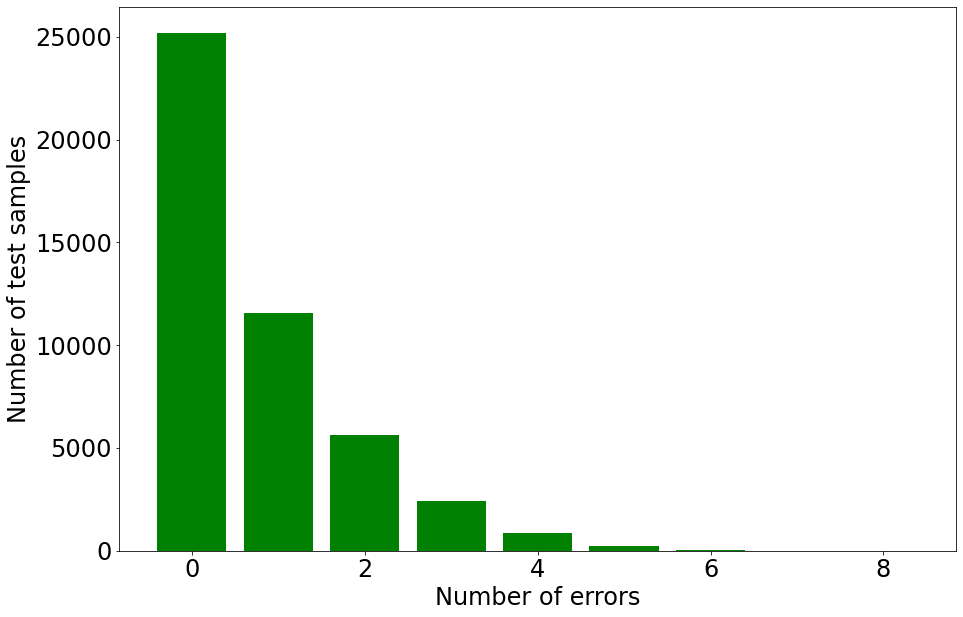

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))
plt.bar(error_cat, num_errors_per_cat, color="green")
plt.xlabel('Number of errors', fontsize=24)
plt.ylabel('Number of test samples', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
#plt.savefig('', bbox_inches = 'tight')
plt.show()


In [95]:
len(number_of_errors_per_vector)

45926

[0.5481862126028829, 0.2521447546052345, 0.12287157601358707, 0.052257980229064145, 0.01863867961503288, 0.004833863171188434, 0.0009798371292949527, 8.709663371510691e-05, 0.0]


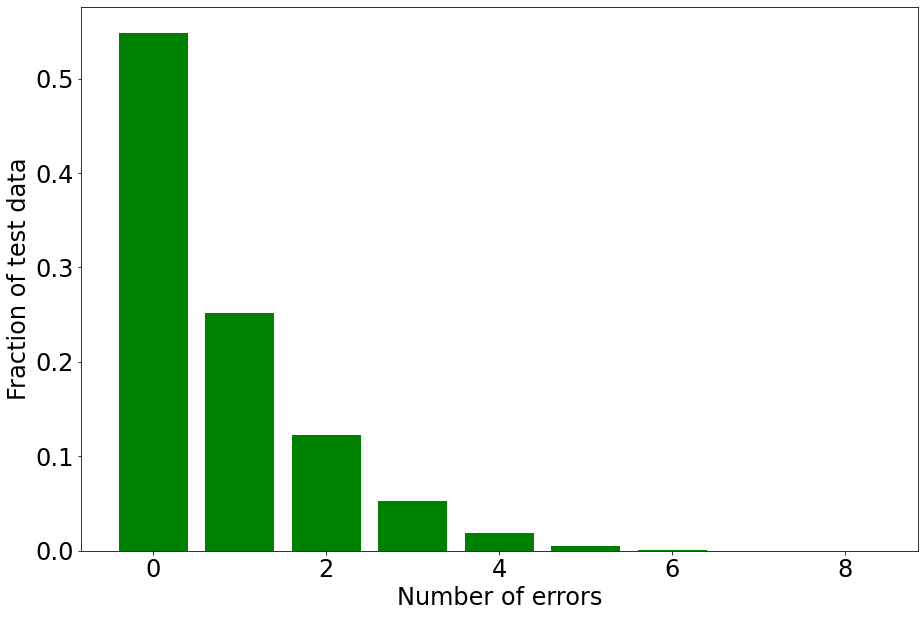

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fraction_errors_per_cat = [i/len(number_of_errors_per_vector) for i in num_errors_per_cat]
print(fraction_errors_per_cat)

plt.figure(figsize=(15, 10))
plt.bar(error_cat, fraction_errors_per_cat, color="green")
plt.xlabel('Number of errors', fontsize=24)
plt.ylabel('Fraction of test data', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
#plt.savefig('', bbox_inches = 'tight')
plt.show()

Analysis of the predicted CVSS base score

In [97]:
from cvss import CVSS3

test = true_cvss_vector_strings[10]
print(test)

print(CVSS3(test).scores()[0])


CVSS:3.1/AV:L/AC:H/PR:L/UI:R/S:C/C:L/I:L/A:L
5.0


In [98]:
from cvss import CVSS3

recalculated_true_base_scores = [CVSS3(i).scores()[0] for i in true_cvss_vector_strings]

print(sum([i-j for i, j in zip(true_base_scores, recalculated_true_base_scores)]))
for i, j in zip(true_base_scores, recalculated_true_base_scores):
    print(i, j, i-j)

0.0
5.4 5.4 0.0
9.8 9.8 0.0
5.4 5.4 0.0
5.5 5.5 0.0
5.3 5.3 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
5.0 5.0 0.0
7.5 7.5 0.0
8.8 8.8 0.0
9.6 9.6 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
6.7 6.7 0.0
5.9 5.9 0.0
6.5 6.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
6.7 6.7 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
6.1 6.1 0.0
5.6 5.6 0.0
5.3 5.3 0.0
7.1 7.1 0.0
5.4 5.4 0.0
9.1 9.1 0.0
7.8 7.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
4.7 4.7 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.5 7.5 0.0
5.9 5.9 0.0
6.1 6.1 0.0
5.4 5.4 0.0
8.8 8.8 0.0
9.8 9.8 0.0
5.8 5.8 0.0
6.5 6.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.2 7.2 0.0
5.5 5.5 0.0
5.5 5.5 0.0
5.4 5.4 0.0
4.9 4.9 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.0 7.0 0.0
7.8 7.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.3 5.3 0.0
6.5 6.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.2 6.2 0.0
8.8 8.8 0.0
4.1 4.1 0.0
6.5 6.5 0.0
6.1 6.1 0.0
8.8 8.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0


9.8 9.8 0.0
4.3 4.3 0.0
7.8 7.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
6.1 6.1 0.0
8.8 8.8 0.0
6.0 6.0 0.0
9.1 9.1 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.4 7.4 0.0
5.5 5.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
4.8 4.8 0.0
5.3 5.3 0.0
6.1 6.1 0.0
7.8 7.8 0.0
5.9 5.9 0.0
6.7 6.7 0.0
6.1 6.1 0.0
4.8 4.8 0.0
6.1 6.1 0.0
8.8 8.8 0.0
5.5 5.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
7.2 7.2 0.0
6.1 6.1 0.0
7.5 7.5 0.0
4.7 4.7 0.0
7.8 7.8 0.0
5.3 5.3 0.0
6.5 6.5 0.0
4.7 4.7 0.0
9.8 9.8 0.0
8.8 8.8 0.0
5.9 5.9 0.0
9.8 9.8 0.0
5.5 5.5 0.0
2.4 2.4 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
4.5 4.5 0.0
4.3 4.3 0.0
9.8 9.8 0.0
6.5 6.5 0.0
5.3 5.3 0.0
5.9 5.9 0.0
5.5 5.5 0.0
5.5 5.5 0.0
5.3 5.3 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.2 7.2 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
7.5 7.5 0.0
9.1 9.1 0.0
9.8 9.8 0.0
8.1 8.1 0.0
9.8 9.8 0.0
4.4 4.4 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.5 5.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
7.5 

5.3 5.3 0.0
7.2 7.2 0.0
6.1 6.1 0.0
7.7 7.7 0.0
5.4 5.4 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.8 6.8 0.0
5.4 5.4 0.0
4.3 4.3 0.0
4.9 4.9 0.0
7.5 7.5 0.0
7.8 7.8 0.0
5.5 5.5 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
8.8 8.8 0.0
5.4 5.4 0.0
8.8 8.8 0.0
5.5 5.5 0.0
6.1 6.1 0.0
5.4 5.4 0.0
7.8 7.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
6.7 6.7 0.0
5.5 5.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
6.7 6.7 0.0
9.8 9.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
6.5 6.5 0.0
5.5 5.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
9.9 9.9 0.0
8.6 8.6 0.0
5.4 5.4 0.0
8.8 8.8 0.0
9.1 9.1 0.0
6.5 6.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
8.2 8.2 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
9.1 9.1 0.0
6.5 6.5 0.0
5.5 5.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.7 6.7 0.0
6.1 6.1 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
3.3 3.3 0.0
7.5 7.5 0.0
6.1 6.1 0.0
4.3 4.3 0.0
9.8 9.8 0.0
8.8 8.8 0.0
6.1 6.1 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
6.5 6.5 0.0
2.7 2.7 0.0
6.1 6.1 0.0
7.5 7.5 0.0
9.1 9.1 0.0
5.5 5.5 0.0
8.8 

7.8 7.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
3.3 3.3 0.0
8.8 8.8 0.0
9.0 9.0 0.0
5.4 5.4 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
5.3 5.3 0.0
5.4 5.4 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.2 7.2 0.0
7.8 7.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.2 7.2 0.0
7.5 7.5 0.0
6.7 6.7 0.0
7.2 7.2 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
4.7 4.7 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
4.3 4.3 0.0
7.5 7.5 0.0
6.5 6.5 0.0
5.3 5.3 0.0
8.8 8.8 0.0
8.0 8.0 0.0
7.5 7.5 0.0
7.8 7.8 0.0
6.1 6.1 0.0
9.6 9.6 0.0
4.3 4.3 0.0
9.8 9.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
5.4 5.4 0.0
4.3 4.3 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
6.1 6.1 0.0
4.3 4.3 0.0
8.8 8.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
8.1 8.1 0.0
8.8 8.8 0.0
4.8 4.8 0.0
8.1 

6.8 6.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
7.1 7.1 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
5.4 5.4 0.0
7.3 7.3 0.0
4.4 4.4 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
5.4 5.4 0.0
8.8 8.8 0.0
7.8 7.8 0.0
5.4 5.4 0.0
5.9 5.9 0.0
8.6 8.6 0.0
8.8 8.8 0.0
5.4 5.4 0.0
6.0 6.0 0.0
5.4 5.4 0.0
9.1 9.1 0.0
5.5 5.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
6.2 6.2 0.0
9.8 9.8 0.0
9.8 9.8 0.0
4.3 4.3 0.0
7.5 7.5 0.0
8.3 8.3 0.0
5.5 5.5 0.0
6.5 6.5 0.0
5.3 5.3 0.0
7.5 7.5 0.0
8.2 8.2 0.0
7.5 7.5 0.0
9.8 9.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
4.3 4.3 0.0
8.8 8.8 0.0
5.5 5.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.3 7.3 0.0
6.5 6.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
5.4 5.4 0.0
6.1 6.1 0.0
8.1 8.1 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
5.9 5.9 0.0
6.5 6.5 0.0
9.9 9.9 0.0
7.5 7.5 0.0
8.2 8.2 0.0
7.8 7.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.2 7.2 0.0
6.5 6.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
4.8 4.8 0.0
9.1 9.1 0.0
7.5 

5.5 5.5 0.0
7.8 7.8 0.0
9.1 9.1 0.0
5.3 5.3 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
9.8 9.8 0.0
5.3 5.3 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
4.4 4.4 0.0
7.8 7.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
5.4 5.4 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
6.5 6.5 0.0
6.1 6.1 0.0
8.8 8.8 0.0
6.7 6.7 0.0
8.6 8.6 0.0
6.5 6.5 0.0
5.3 5.3 0.0
9.8 9.8 0.0
9.1 9.1 0.0
10.0 10.0 0.0
5.5 5.5 0.0
7.8 7.8 0.0
4.9 4.9 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
5.6 5.6 0.0
8.8 8.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
5.5 5.5 0.0
5.3 5.3 0.0
8.1 8.1 0.0
8.8 8.8 0.0
7.8 7.8 0.0
6.7 6.7 0.0
7.8 7.8 0.0
8.3 8.3 0.0
6.1 6.1 0.0
7.5 7.5 0.0
4.3 4.3 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.5 6.5 0.0
5.5 5.5 0.0
9.8 9.8 0.0
5.4 5.4 0.0
9.8 9.8 0.0
6.8 6.8 0.0
5.3 5.3 0.0
9.8 9.8 0.0
5.5 5.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
5.3 5.3 0.0
8.8 8.8 0.0
6.8 6.8 0.0
7.

5.8 5.8 0.0
8.2 8.2 0.0
6.1 6.1 0.0
4.3 4.3 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
6.1 6.1 0.0
5.3 5.3 0.0
7.5 7.5 0.0
5.3 5.3 0.0
8.8 8.8 0.0
6.1 6.1 0.0
4.3 4.3 0.0
4.8 4.8 0.0
7.2 7.2 0.0
6.5 6.5 0.0
4.3 4.3 0.0
9.8 9.8 0.0
4.8 4.8 0.0
5.9 5.9 0.0
4.7 4.7 0.0
6.1 6.1 0.0
7.5 7.5 0.0
3.3 3.3 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
5.3 5.3 0.0
3.3 3.3 0.0
5.4 5.4 0.0
7.5 7.5 0.0
6.2 6.2 0.0
6.5 6.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
5.4 5.4 0.0
6.1 6.1 0.0
10.0 10.0 0.0
5.5 5.5 0.0
9.8 9.8 0.0
5.3 5.3 0.0
9.8 9.8 0.0
5.5 5.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
5.6 5.6 0.0
8.8 8.8 0.0
8.1 8.1 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.1 6.1 0.0
8.8 8.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.2 7.2 0.0
6.0 6.0 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
5.4 5.4 0.0
5.3 5.3 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
4.3 4.3 0.0
7.4 7.4 0.0
9.8 9.8 0.0
5.5 5.5 0.0
8.8 8.8 0.0
7.

7.8 7.8 0.0
2.4 2.4 0.0
8.6 8.6 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
5.4 5.4 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
4.3 4.3 0.0
9.8 9.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
8.3 8.3 0.0
8.8 8.8 0.0
5.9 5.9 0.0
8.8 8.8 0.0
9.9 9.9 0.0
7.5 7.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
5.5 5.5 0.0
4.3 4.3 0.0
9.8 9.8 0.0
6.5 6.5 0.0
5.5 5.5 0.0
6.5 6.5 0.0
6.1 6.1 0.0
7.8 7.8 0.0
8.3 8.3 0.0
6.1 6.1 0.0
4.4 4.4 0.0
8.8 8.8 0.0
7.5 7.5 0.0
5.4 5.4 0.0
7.8 7.8 0.0
8.1 8.1 0.0
4.3 4.3 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
6.1 6.1 0.0
8.8 8.8 0.0
7.5 7.5 0.0
5.4 5.4 0.0
8.8 8.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
6.8 6.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
6.1 6.1 0.0
5.5 5.5 0.0
4.9 4.9 0.0
6.5 6.5 0.0
7.8 7.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
6.8 6.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
8.2 8.2 0.0
8.1 8.1 0.0
8.1 8.1 0.0
7.8 7.8 0.0
7.8 7.8 0.0
4.5 4.5 0.0
8.3 8.3 0.0
8.8 

7.5 7.5 0.0
4.1 4.1 0.0
7.8 7.8 0.0
6.5 6.5 0.0
6.2 6.2 0.0
7.5 7.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
9.8 9.8 0.0
3.4 3.4 0.0
7.5 7.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.8 7.8 0.0
5.3 5.3 0.0
8.8 8.8 0.0
8.8 8.8 0.0
5.5 5.5 0.0
6.5 6.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
4.8 4.8 0.0
9.9 9.9 0.0
10.0 10.0 0.0
7.8 7.8 0.0
8.8 8.8 0.0
2.7 2.7 0.0
8.8 8.8 0.0
5.3 5.3 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
8.8 8.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
6.1 6.1 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.2 7.2 0.0
4.4 4.4 0.0
6.5 6.5 0.0
6.5 6.5 0.0
6.7 6.7 0.0
9.8 9.8 0.0
8.8 8.8 0.0
5.9 5.9 0.0
6.5 6.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
7.4 7.4 0.0
7.8 7.8 0.0
4.3 4.3 0.0
8.8 8.8 0.0
10.0 10.0 0.0
6.1 6.1 0.0
8.8 8.8 0.0
6.1 6.1 0.0
6.5 6.5 0.0
9.6 9.6 0.0
4.3 4.3 0.0
6.8 6.8 0.0
5.3 5.3 0.0
6.1 6.1 0.0
5.3 5.3 0.0
6.5 6.5 0.0
4.3 4.3 0.0
9.8 9.8 0.0
5.9 5.9 0.0
5.3 5.3 0.0
5.5 5.5 0.0
5.9 5.9 0.0
7.5 7.5 0.0
9.8 9.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
8.8 8.8 0.0
8.1 8.1 0.0
9.8 9.8 0.0
4.8 4.8 0.0
5.5 5.5 0.0


7.8 7.8 0.0
7.8 7.8 0.0
8.0 8.0 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
5.3 5.3 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
9.9 9.9 0.0
3.5 3.5 0.0
5.9 5.9 0.0
9.8 9.8 0.0
9.1 9.1 0.0
9.1 9.1 0.0
8.8 8.8 0.0
2.4 2.4 0.0
6.1 6.1 0.0
6.1 6.1 0.0
6.5 6.5 0.0
6.5 6.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
6.3 6.3 0.0
6.5 6.5 0.0
5.5 5.5 0.0
8.2 8.2 0.0
7.0 7.0 0.0
9.8 9.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
8.6 8.6 0.0
5.6 5.6 0.0
6.1 6.1 0.0
4.9 4.9 0.0
7.8 7.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
5.5 5.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
6.5 6.5 0.0
7.8 7.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
5.0 5.0 0.0
6.5 6.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
5.5 5.5 0.0
6.1 6.1 0.0
6.1 6.1 0.0
7.8 7.8 0.0
7.5 7.5 0.0
4.8 4.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
4.1 4.1 0.0
8.8 8.8 0.0
8.1 8.1 0.0
7.8 7.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
5.9 5.9 0.0
5.4 5.4 0.0
6.1 6.1 0.0
6.5 6.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
9.8 

9.8 9.8 0.0
7.5 7.5 0.0
3.3 3.3 0.0
9.8 9.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
4.8 4.8 0.0
6.1 6.1 0.0
8.8 8.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
6.7 6.7 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.1 7.1 0.0
3.3 3.3 0.0
5.9 5.9 0.0
3.3 3.3 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.2 7.2 0.0
8.8 8.8 0.0
8.0 8.0 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
2.8 2.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
5.5 5.5 0.0
7.6 7.6 0.0
7.1 7.1 0.0
8.8 8.8 0.0
8.0 8.0 0.0
9.8 9.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
8.2 8.2 0.0
7.5 7.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
6.1 6.1 0.0
7.8 7.8 0.0
8.8 8.8 0.0
6.7 6.7 0.0
7.8 7.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
5.5 5.5 0.0
9.8 9.8 0.0
9.1 9.1 0.0
8.1 8.1 0.0
5.3 5.3 0.0
6.5 6.5 0.0
9.8 9.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
6.3 6.3 0.0
7.8 7.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
7.8 7.8 0.0
7.2 7.2 0.0
8.1 8.1 0.0
7.8 7.8 0.0
7.5 7.5 0.0
5.4 5.4 0.0
9.8 9.8 0.0
5.0 5.0 0.0
7.8 7.8 0.0
8.7 8.7 0.0
5.9 5.9 0.0
7.5 7.5 0.0
7.5 7.5 0.0
5.3 5.3 0.0
7.2 7.2 0.0
7.5 

3.3 3.3 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.2 7.2 0.0
9.8 9.8 0.0
4.3 4.3 0.0
4.4 4.4 0.0
7.5 7.5 0.0
5.5 5.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.4 7.4 0.0
7.5 7.5 0.0
9.8 9.8 0.0
5.3 5.3 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
9.8 9.8 0.0
9.1 9.1 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.1 9.1 0.0
9.8 9.8 0.0
4.8 4.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.7 7.7 0.0
8.8 8.8 0.0
9.8 9.8 0.0
5.3 5.3 0.0
7.8 7.8 0.0
9.8 9.8 0.0
4.3 4.3 0.0
6.5 6.5 0.0
7.5 7.5 0.0
5.5 5.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.0 7.0 0.0
6.1 6.1 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
8.1 8.1 0.0
4.8 4.8 0.0
7.9 7.9 0.0
4.3 4.3 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
4.8 4.8 0.0
8.8 8.8 0.0
7.0 7.0 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
5.5 5.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.2 7.2 0.0
5.3 5.3 0.0
4.6 4.6 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
6.1 6.1 0.0
6.8 

8.8 8.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
6.7 6.7 0.0
9.8 9.8 0.0
5.4 5.4 0.0
8.8 8.8 0.0
6.1 6.1 0.0
8.8 8.8 0.0
8.6 8.6 0.0
7.6 7.6 0.0
9.8 9.8 0.0
5.8 5.8 0.0
6.1 6.1 0.0
8.8 8.8 0.0
5.3 5.3 0.0
5.9 5.9 0.0
9.8 9.8 0.0
5.3 5.3 0.0
6.5 6.5 0.0
5.5 5.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
4.3 4.3 0.0
8.8 8.8 0.0
5.3 5.3 0.0
7.8 7.8 0.0
5.5 5.5 0.0
6.5 6.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
5.5 5.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
9.1 9.1 0.0
8.8 8.8 0.0
7.2 7.2 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.8 6.8 0.0
7.5 7.5 0.0
4.9 4.9 0.0
7.2 7.2 0.0
6.5 6.5 0.0
9.8 9.8 0.0
6.7 6.7 0.0
5.5 5.5 0.0
7.2 7.2 0.0
6.5 6.5 0.0
5.9 5.9 0.0
9.8 9.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
4.3 4.3 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.8 7.8 0.0
5.4 5.4 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
6.1 6.1 0.0
4.9 4.9 0.0
6.1 6.1 0.0
5.3 5.3 0.0
9.8 9.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
5.9 5.9 0.0
7.5 

6.1 6.1 0.0
9.8 9.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.6 7.6 0.0
2.7 2.7 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.1 7.1 0.0
7.8 7.8 0.0
6.5 6.5 0.0
6.7 6.7 0.0
4.3 4.3 0.0
8.2 8.2 0.0
6.5 6.5 0.0
6.5 6.5 0.0
7.1 7.1 0.0
4.6 4.6 0.0
5.3 5.3 0.0
8.8 8.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.3 5.3 0.0
8.8 8.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
5.3 5.3 0.0
5.3 5.3 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
6.7 6.7 0.0
7.5 7.5 0.0
6.1 6.1 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
7.5 7.5 0.0
4.3 4.3 0.0
5.4 5.4 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.8 6.8 0.0
9.1 9.1 0.0
6.7 6.7 0.0
7.8 7.8 0.0
9.3 9.3 0.0
7.5 7.5 0.0
6.1 6.1 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
5.9 5.9 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
5.4 5.4 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
5.4 5.4 0.0
8.8 

6.1 6.1 0.0
5.3 5.3 0.0
8.8 8.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.5 7.5 0.0
4.3 4.3 0.0
9.8 9.8 0.0
8.1 8.1 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.3 7.3 0.0
9.8 9.8 0.0
4.4 4.4 0.0
7.5 7.5 0.0
5.3 5.3 0.0
4.2 4.2 0.0
5.5 5.5 0.0
5.5 5.5 0.0
7.8 7.8 0.0
6.1 6.1 0.0
6.3 6.3 0.0
7.8 7.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
8.6 8.6 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.1 7.1 0.0
6.5 6.5 0.0
6.1 6.1 0.0
7.8 7.8 0.0
5.5 5.5 0.0
4.3 4.3 0.0
6.5 6.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.3 5.3 0.0
7.8 7.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
5.9 5.9 0.0
6.5 6.5 0.0
9.8 9.8 0.0
5.3 5.3 0.0
6.5 6.5 0.0
5.5 5.5 0.0
5.5 5.5 0.0
9.8 9.8 0.0
4.3 4.3 0.0
5.0 5.0 0.0
8.8 8.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
6.1 6.1 0.0
7.8 7.8 0.0
6.7 6.7 0.0
7.8 7.8 0.0
7.5 7.5 0.0
5.4 5.4 0.0
7.5 7.5 0.0
4.3 4.3 0.0
8.8 8.8 0.0
8.8 

7.2 7.2 0.0
9.8 9.8 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
7.2 7.2 0.0
5.9 5.9 0.0
9.1 9.1 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.2 7.2 0.0
7.5 7.5 0.0
5.3 5.3 0.0
7.5 7.5 0.0
4.4 4.4 0.0
9.8 9.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.1 7.1 0.0
6.5 6.5 0.0
9.8 9.8 0.0
2.3 2.3 0.0
9.8 9.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
4.3 4.3 0.0
6.1 6.1 0.0
8.1 8.1 0.0
9.8 9.8 0.0
4.4 4.4 0.0
6.1 6.1 0.0
5.5 5.5 0.0
4.3 4.3 0.0
5.3 5.3 0.0
7.8 7.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
5.5 5.5 0.0
6.6 6.6 0.0
5.5 5.5 0.0
7.5 7.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
6.5 6.5 0.0
5.5 5.5 0.0
4.8 4.8 0.0
7.8 7.8 0.0
5.4 5.4 0.0
5.5 5.5 0.0
5.4 5.4 0.0
2.3 2.3 0.0
7.8 7.8 0.0
2.5 2.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
5.5 5.5 0.0
5.9 5.9 0.0
9.0 9.0 0.0
8.8 8.8 0.0
6.3 6.3 0.0
5.4 5.4 0.0
7.2 7.2 0.0
4.3 4.3 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
4.3 4.3 0.0
6.1 6.1 0.0
5.5 5.5 0.0
9.8 9.8 0.0
5.5 5.5 0.0
9.8 9.8 0.0
4.3 4.3 0.0
4.7 

7.5 7.5 0.0
6.0 6.0 0.0
7.5 7.5 0.0
5.4 5.4 0.0
5.4 5.4 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
6.1 6.1 0.0
4.3 4.3 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
9.1 9.1 0.0
9.8 9.8 0.0
4.8 4.8 0.0
5.5 5.5 0.0
5.5 5.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
5.4 5.4 0.0
5.5 5.5 0.0
6.5 6.5 0.0
7.8 7.8 0.0
6.5 6.5 0.0
5.5 5.5 0.0
5.5 5.5 0.0
6.2 6.2 0.0
4.0 4.0 0.0
4.9 4.9 0.0
9.8 9.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
4.4 4.4 0.0
6.5 6.5 0.0
8.2 8.2 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
6.5 6.5 0.0
5.5 5.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.1 7.1 0.0
5.5 5.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
5.5 5.5 0.0
5.4 5.4 0.0
5.4 5.4 0.0
7.8 7.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
8.4 8.4 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
4.4 4.4 0.0
8.8 8.8 0.0
4.3 4.3 0.0
7.8 7.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
6.1 6.1 0.0
9.8 9.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.1 7.1 0.0
2.4 2.4 0.0
7.8 7.8 0.0
8.2 8.2 0.0
7.8 

6.5 6.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
5.4 5.4 0.0
2.4 2.4 0.0
6.1 6.1 0.0
8.1 8.1 0.0
9.8 9.8 0.0
5.5 5.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
8.6 8.6 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
4.8 4.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
8.8 8.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
5.3 5.3 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
6.5 6.5 0.0
5.4 5.4 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
4.9 4.9 0.0
2.7 2.7 0.0
6.1 6.1 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
9.1 9.1 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.4 5.4 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.8 7.8 0.0
8.2 8.2 0.0
7.8 7.8 0.0
4.6 4.6 0.0
4.3 4.3 0.0
5.3 5.3 0.0
6.5 6.5 0.0
5.3 5.3 0.0
5.5 5.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
5.5 5.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
5.4 5.4 0.0
9.1 9.1 0.0
6.1 6.1 0.0
8.8 8.8 0.0
4.8 4.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
6.1 6.1 0.0
4.3 4.3 0.0
8.8 8.8 0.0
7.8 

9.8 9.8 0.0
6.3 6.3 0.0
8.8 8.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.2 7.2 0.0
7.8 7.8 0.0
4.3 4.3 0.0
5.5 5.5 0.0
9.1 9.1 0.0
6.1 6.1 0.0
7.8 7.8 0.0
8.8 8.8 0.0
8.1 8.1 0.0
6.1 6.1 0.0
7.1 7.1 0.0
6.5 6.5 0.0
4.3 4.3 0.0
8.8 8.8 0.0
7.2 7.2 0.0
6.5 6.5 0.0
6.1 6.1 0.0
8.8 8.8 0.0
6.5 6.5 0.0
6.1 6.1 0.0
5.9 5.9 0.0
5.5 5.5 0.0
7.2 7.2 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
7.2 7.2 0.0
8.8 8.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
7.8 7.8 0.0
6.5 6.5 0.0
6.1 6.1 0.0
5.4 5.4 0.0
5.5 5.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
5.4 5.4 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.2 7.2 0.0
6.1 6.1 0.0
5.4 5.4 0.0
4.3 4.3 0.0
6.1 6.1 0.0
8.8 8.8 0.0
7.8 7.8 0.0
5.7 5.7 0.0
9.8 9.8 0.0
3.3 3.3 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
8.1 8.1 0.0
4.8 4.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
4.3 4.3 0.0
6.1 6.1 0.0
9.8 9.8 0.0
6.3 6.3 0.0
5.3 5.3 0.0
8.8 8.8 0.0
6.5 6.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.5 

6.5 6.5 0.0
6.1 6.1 0.0
6.1 6.1 0.0
9.6 9.6 0.0
4.3 4.3 0.0
7.8 7.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.5 5.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
9.0 9.0 0.0
4.7 4.7 0.0
8.8 8.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
8.8 8.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.2 7.2 0.0
9.8 9.8 0.0
6.5 6.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
6.5 6.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
3.6 3.6 0.0
7.2 7.2 0.0
6.5 6.5 0.0
4.3 4.3 0.0
5.4 5.4 0.0
7.5 7.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.4 7.4 0.0
5.9 5.9 0.0
7.2 7.2 0.0
5.5 5.5 0.0
5.4 5.4 0.0
8.8 8.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.8 6.8 0.0
6.5 6.5 0.0
6.4 6.4 0.0
8.8 8.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
6.5 6.5 0.0
6.3 6.3 0.0
8.0 8.0 0.0
8.8 8.8 0.0
4.9 4.9 0.0
5.9 5.9 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.9 5.9 0.0
8.8 8.8 0.0
6.2 6.2 0.0
9.8 9.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
5.5 5.5 0.0
5.3 5.3 0.0
7.8 7.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
7.1 7.1 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.5 7.5 0.0
6.1 

7.5 7.5 0.0
7.5 7.5 0.0
4.6 4.6 0.0
7.5 7.5 0.0
4.6 4.6 0.0
5.3 5.3 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
6.7 6.7 0.0
8.6 8.6 0.0
8.0 8.0 0.0
5.0 5.0 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.5 7.5 0.0
5.3 5.3 0.0
5.5 5.5 0.0
7.8 7.8 0.0
5.3 5.3 0.0
4.8 4.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
4.3 4.3 0.0
8.8 8.8 0.0
4.3 4.3 0.0
5.3 5.3 0.0
7.8 7.8 0.0
7.8 7.8 0.0
5.4 5.4 0.0
6.5 6.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
5.5 5.5 0.0
4.9 4.9 0.0
4.3 4.3 0.0
9.6 9.6 0.0
6.5 6.5 0.0
8.1 8.1 0.0
7.1 7.1 0.0
5.4 5.4 0.0
5.4 5.4 0.0
5.5 5.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
4.8 4.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
4.2 4.2 0.0
4.3 4.3 0.0
3.3 3.3 0.0
6.1 6.1 0.0
7.8 7.8 0.0
3.7 3.7 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.4 7.4 0.0
7.5 7.5 0.0
4.7 4.7 0.0
5.3 5.3 0.0
2.7 2.7 0.0
6.0 6.0 0.0
5.3 5.3 0.0
5.4 5.4 0.0
5.5 5.5 0.0
6.5 6.5 0.0
9.1 9.1 0.0
7.5 7.5 0.0
7.5 7.5 0.0
4.3 4.3 0.0
6.5 6.5 0.0
7.4 7.4 0.0
5.4 5.4 0.0
7.5 7.5 0.0
5.4 5.4 0.0
8.8 8.8 0.0
6.0 6.0 0.0
10.0

6.5 6.5 0.0
4.8 4.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.2 7.2 0.0
4.6 4.6 0.0
8.8 8.8 0.0
9.8 9.8 0.0
5.4 5.4 0.0
4.8 4.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
4.8 4.8 0.0
7.5 7.5 0.0
4.8 4.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
6.8 6.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
5.3 5.3 0.0
7.8 7.8 0.0
7.5 7.5 0.0
5.4 5.4 0.0
7.2 7.2 0.0
8.8 8.8 0.0
6.5 6.5 0.0
8.0 8.0 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.2 7.2 0.0
8.1 8.1 0.0
7.5 7.5 0.0
6.1 6.1 0.0
7.8 7.8 0.0
7.0 7.0 0.0
9.8 9.8 0.0
8.8 8.8 0.0
4.9 4.9 0.0
6.1 6.1 0.0
5.4 5.4 0.0
6.1 6.1 0.0
7.0 7.0 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
4.2 4.2 0.0
4.8 4.8 0.0
8.2 8.2 0.0
8.1 8.1 0.0
5.4 5.4 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
5.5 5.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
6.5 6.5 0.0
4.3 4.3 0.0
7.5 7.5 0.0
6.5 6.5 0.0
6.1 6.1 0.0
5.5 5.5 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.8 6.8 0.0
6.5 6.5 0.0
6.1 

6.1 6.1 0.0
8.0 8.0 0.0
4.3 4.3 0.0
8.8 8.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
8.8 8.8 0.0
8.1 8.1 0.0
5.5 5.5 0.0
9.8 9.8 0.0
6.7 6.7 0.0
7.5 7.5 0.0
5.8 5.8 0.0
7.8 7.8 0.0
3.3 3.3 0.0
3.7 3.7 0.0
6.1 6.1 0.0
8.1 8.1 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
2.7 2.7 0.0
8.8 8.8 0.0
8.1 8.1 0.0
5.6 5.6 0.0
8.6 8.6 0.0
7.8 7.8 0.0
5.5 5.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.1 7.1 0.0
7.5 7.5 0.0
5.8 5.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
5.5 5.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
4.3 4.3 0.0
6.1 6.1 0.0
8.4 8.4 0.0
5.5 5.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
5.3 5.3 0.0
8.6 8.6 0.0
6.5 6.5 0.0
5.5 5.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.1 9.1 0.0
7.3 7.3 0.0
8.1 8.1 0.0
5.5 5.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
6.1 6.1 0.0
5.4 5.4 0.0
6.7 6.7 0.0
7.2 7.2 0.0
6.0 6.0 0.0
6.1 6.1 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
9.9 9.9 0.0
7.8 7.8 0.0
5.5 5.5 0.0
6.7 6.7 0.0
6.1 6.1 0.0
8.1 8.1 0.0
5.5 5.5 0.0
6.8 6.8 0.0
5.3 5.3 0.0
7.5 

7.8 7.8 0.0
6.0 6.0 0.0
5.4 5.4 0.0
6.5 6.5 0.0
8.6 8.6 0.0
5.8 5.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
5.9 5.9 0.0
4.8 4.8 0.0
8.2 8.2 0.0
9.8 9.8 0.0
5.3 5.3 0.0
8.8 8.8 0.0
5.5 5.5 0.0
5.4 5.4 0.0
6.5 6.5 0.0
6.1 6.1 0.0
4.3 4.3 0.0
4.9 4.9 0.0
9.8 9.8 0.0
5.4 5.4 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
4.3 4.3 0.0
8.8 8.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
5.3 5.3 0.0
7.8 7.8 0.0
7.8 7.8 0.0
6.1 6.1 0.0
5.3 5.3 0.0
9.8 9.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
8.1 8.1 0.0
7.5 7.5 0.0
7.8 7.8 0.0
5.4 5.4 0.0
8.8 8.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
5.5 5.5 0.0
4.8 4.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
6.7 6.7 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
6.7 6.7 0.0
7.5 7.5 0.0
7.8 7.8 0.0
4.7 4.7 0.0
5.5 5.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.2 8.2 0.0
5.5 5.5 0.0
5.5 5.5 0.0
8.6 8.6 0.0
8.2 8.2 0.0
9.8 9.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
4.6 4.6 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
4.8 4.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.5 

6.5 6.5 0.0
5.6 5.6 0.0
4.3 4.3 0.0
5.3 5.3 0.0
7.5 7.5 0.0
5.4 5.4 0.0
8.8 8.8 0.0
8.8 8.8 0.0
4.3 4.3 0.0
8.8 8.8 0.0
6.8 6.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
5.4 5.4 0.0
9.8 9.8 0.0
7.3 7.3 0.0
7.0 7.0 0.0
5.5 5.5 0.0
9.8 9.8 0.0
6.1 6.1 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
4.7 4.7 0.0
9.8 9.8 0.0
5.4 5.4 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.3 7.3 0.0
9.8 9.8 0.0
7.5 7.5 0.0
5.3 5.3 0.0
7.8 7.8 0.0
6.7 6.7 0.0
7.5 7.5 0.0
5.5 5.5 0.0
4.2 4.2 0.0
7.8 7.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
5.3 5.3 0.0
4.3 4.3 0.0
6.1 6.1 0.0
8.8 8.8 0.0
7.8 7.8 0.0
6.1 6.1 0.0
5.5 5.5 0.0
5.5 5.5 0.0
7.1 7.1 0.0
7.5 7.5 0.0
5.5 5.5 0.0
7.5 7.5 0.0
4.8 4.8 0.0
6.1 6.1 0.0
9.8 9.8 0.0
6.5 6.5 0.0
6.1 6.1 0.0
8.3 8.3 0.0
5.3 5.3 0.0
6.1 6.1 0.0
6.1 6.1 0.0
7.8 7.8 0.0
8.1 8.1 0.0
6.1 6.1 0.0
7.8 7.8 0.0
5.5 5.5 0.0
9.8 9.8 0.0
5.9 5.9 0.0
7.5 7.5 0.0
6.5 6.5 0.0
6.1 6.1 0.0
7.8 7.8 0.0
7.5 7.5 0.0
5.3 5.3 0.0
7.8 7.8 0.0
7.5 7.5 0.0
9.8 

9.3 9.3 0.0
4.3 4.3 0.0
5.4 5.4 0.0
5.3 5.3 0.0
6.1 6.1 0.0
10.0 10.0 0.0
6.3 6.3 0.0
6.1 6.1 0.0
6.5 6.5 0.0
7.0 7.0 0.0
7.5 7.5 0.0
4.8 4.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
6.3 6.3 0.0
4.9 4.9 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.6 8.6 0.0
9.8 9.8 0.0
5.5 5.5 0.0
5.5 5.5 0.0
8.8 8.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
6.5 6.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
6.1 6.1 0.0
4.3 4.3 0.0
7.8 7.8 0.0
6.5 6.5 0.0
8.3 8.3 0.0
9.0 9.0 0.0
7.8 7.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.2 7.2 0.0
5.4 5.4 0.0
7.0 7.0 0.0
5.3 5.3 0.0
8.8 8.8 0.0
6.1 6.1 0.0
8.8 8.8 0.0
8.1 8.1 0.0
7.8 7.8 0.0
7.1 7.1 0.0
6.5 6.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.5 6.5 0.0
7.2 7.2 0.0
9.8 9.8 0.0
4.9 4.9 0.0
5.4 5.4 0.0
8.8 8.8 0.0
7.5 7.5 0.0
5.4 5.4 0.0
8.8 8.8 0.0
5.4 5.4 0.0
7.8 7.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
5.5 5.5 0.0
8.4 8.4 0.0
8.

9.8 9.8 0.0
5.5 5.5 0.0
9.8 9.8 0.0
7.2 7.2 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
5.4 5.4 0.0
5.5 5.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.5 5.5 0.0
5.4 5.4 0.0
6.1 6.1 0.0
6.1 6.1 0.0
8.0 8.0 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
5.5 5.5 0.0
9.1 9.1 0.0
8.8 8.8 0.0
4.3 4.3 0.0
8.8 8.8 0.0
5.3 5.3 0.0
8.8 8.8 0.0
5.9 5.9 0.0
8.1 8.1 0.0
6.8 6.8 0.0
5.4 5.4 0.0
7.1 7.1 0.0
8.8 8.8 0.0
8.8 8.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.2 6.2 0.0
6.1 6.1 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
5.5 5.5 0.0
4.8 4.8 0.0
4.7 4.7 0.0
6.5 6.5 0.0
5.4 5.4 0.0
9.8 9.8 0.0
7.5 7.5 0.0
4.3 4.3 0.0
9.8 9.8 0.0
5.9 5.9 0.0
6.5 6.5 0.0
7.5 7.5 0.0
4.8 4.8 0.0
9.8 9.8 0.0
6.4 6.4 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
4.3 4.3 0.0
7.5 7.5 0.0
6.5 6.5 0.0
4.3 4.3 0.0
6.8 6.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
8.8 8.8 0.0
4.3 4.3 0.0
6.1 6.1 0.0
6.5 6.5 0.0
7.5 7.5 0.0
5.9 5.9 0.0
8.8 8.8 0.0
5.4 5.4 0.0
8.8 8.8 0.0
7.5 

5.3 5.3 0.0
3.3 3.3 0.0
7.1 7.1 0.0
7.5 7.5 0.0
7.5 7.5 0.0
4.3 4.3 0.0
7.5 7.5 0.0
7.8 7.8 0.0
4.3 4.3 0.0
6.5 6.5 0.0
5.3 5.3 0.0
6.1 6.1 0.0
8.8 8.8 0.0
9.8 9.8 0.0
4.3 4.3 0.0
6.1 6.1 0.0
7.5 7.5 0.0
8.3 8.3 0.0
7.1 7.1 0.0
7.6 7.6 0.0
7.5 7.5 0.0
6.5 6.5 0.0
4.8 4.8 0.0
4.8 4.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
6.1 6.1 0.0
5.3 5.3 0.0
7.8 7.8 0.0
6.1 6.1 0.0
5.3 5.3 0.0
7.1 7.1 0.0
9.0 9.0 0.0
7.2 7.2 0.0
4.7 4.7 0.0
6.5 6.5 0.0
5.3 5.3 0.0
6.1 6.1 0.0
6.1 6.1 0.0
7.1 7.1 0.0
7.1 7.1 0.0
7.2 7.2 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
6.1 6.1 0.0
5.3 5.3 0.0
5.3 5.3 0.0
6.8 6.8 0.0
7.8 7.8 0.0
7.2 7.2 0.0
8.8 8.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
5.5 5.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
9.8 9.8 0.0
9.1 9.1 0.0
9.8 9.8 0.0
7.1 7.1 0.0
7.5 7.5 0.0
6.5 6.5 0.0
6.1 6.1 0.0
7.8 7.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
6.7 6.7 0.0
7.8 7.8 0.0
6.1 6.1 0.0
4.8 4.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
8.1 8.1 0.0
6.5 6.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
8.8 

7.5 7.5 0.0
7.0 7.0 0.0
5.5 5.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
6.1 6.1 0.0
6.1 6.1 0.0
5.5 5.5 0.0
5.4 5.4 0.0
6.5 6.5 0.0
7.8 7.8 0.0
4.3 4.3 0.0
8.8 8.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
7.5 7.5 0.0
6.8 6.8 0.0
6.8 6.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
6.8 6.8 0.0
8.1 8.1 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
8.1 8.1 0.0
7.5 7.5 0.0
7.8 7.8 0.0
6.1 6.1 0.0
5.3 5.3 0.0
8.8 8.8 0.0
5.3 5.3 0.0
6.5 6.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
4.3 4.3 0.0
5.4 5.4 0.0
6.5 6.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
9.8 9.8 0.0
8.8 8.8 0.0
8.1 8.1 0.0
7.2 7.2 0.0
6.5 6.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
8.0 8.0 0.0
6.5 6.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
9.1 9.1 0.0
7.8 7.8 0.0
5.4 5.4 0.0
5.5 5.5 0.0
5.4 5.4 0.0
6.1 6.1 0.0
6.5 6.5 0.0
4.8 4.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
8.8 

7.5 7.5 0.0
5.5 5.5 0.0
5.9 5.9 0.0
7.2 7.2 0.0
8.1 8.1 0.0
7.8 7.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
5.5 5.5 0.0
5.5 5.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
4.8 4.8 0.0
7.8 7.8 0.0
5.9 5.9 0.0
9.8 9.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
4.8 4.8 0.0
6.8 6.8 0.0
7.8 7.8 0.0
5.4 5.4 0.0
4.3 4.3 0.0
7.8 7.8 0.0
6.1 6.1 0.0
6.3 6.3 0.0
5.5 5.5 0.0
7.5 7.5 0.0
5.5 5.5 0.0
8.2 8.2 0.0
7.5 7.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
6.1 6.1 0.0
5.5 5.5 0.0
4.9 4.9 0.0
5.4 5.4 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.4 7.4 0.0
4.8 4.8 0.0
4.3 4.3 0.0
7.5 7.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
5.3 5.3 0.0
6.5 6.5 0.0
5.3 5.3 0.0
6.5 6.5 0.0
4.3 4.3 0.0
9.8 9.8 0.0
5.5 5.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
5.3 5.3 0.0
4.3 4.3 0.0
9.8 9.8 0.0
5.4 5.4 0.0
9.8 9.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
5.3 5.3 0.0
7.1 7.1 0.0
7.5 7.5 0.0
5.5 5.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
4.9 4.9 0.0
5.5 5.5 0.0
8.0 8.0 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
5.5 

8.8 8.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
7.8 7.8 0.0
5.4 5.4 0.0
7.8 7.8 0.0
6.7 6.7 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.8 6.8 0.0
7.1 7.1 0.0
6.5 6.5 0.0
8.2 8.2 0.0
7.8 7.8 0.0
6.1 6.1 0.0
8.8 8.8 0.0
4.8 4.8 0.0
4.3 4.3 0.0
7.8 7.8 0.0
5.8 5.8 0.0
7.8 7.8 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.0 7.0 0.0
8.1 8.1 0.0
6.5 6.5 0.0
5.5 5.5 0.0
7.5 7.5 0.0
5.5 5.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
4.8 4.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
6.5 6.5 0.0
5.4 5.4 0.0
9.8 9.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.2 7.2 0.0
6.1 6.1 0.0
3.3 3.3 0.0
6.1 6.1 0.0
6.8 6.8 0.0
8.8 8.8 0.0
5.4 5.4 0.0
7.2 7.2 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
4.4 4.4 0.0
5.5 5.5 0.0
9.8 9.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
7.4 7.4 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
4.8 4.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
9.1 9.1 0.0
7.8 7.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.1 

9.8 9.8 0.0
8.8 8.8 0.0
6.1 6.1 0.0
5.5 5.5 0.0
6.5 6.5 0.0
4.8 4.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
8.1 8.1 0.0
5.5 5.5 0.0
5.5 5.5 0.0
4.3 4.3 0.0
7.1 7.1 0.0
7.5 7.5 0.0
7.8 7.8 0.0
5.4 5.4 0.0
9.8 9.8 0.0
9.1 9.1 0.0
4.8 4.8 0.0
3.7 3.7 0.0
4.3 4.3 0.0
8.2 8.2 0.0
6.7 6.7 0.0
4.3 4.3 0.0
6.5 6.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
6.8 6.8 0.0
9.1 9.1 0.0
7.2 7.2 0.0
9.8 9.8 0.0
6.5 6.5 0.0
6.8 6.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
4.6 4.6 0.0
6.5 6.5 0.0
5.9 5.9 0.0
7.8 7.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
5.4 5.4 0.0
6.5 6.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
5.4 5.4 0.0
8.8 8.8 0.0
6.5 6.5 0.0
5.3 5.3 0.0
9.8 9.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
4.3 4.3 0.0
6.8 6.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
8.1 8.1 0.0
7.5 7.5 0.0
7.8 7.8 0.0
5.9 5.9 0.0
4.8 4.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
5.3 5.3 0.0
8.6 8.6 0.0
7.8 7.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
6.1 6.1 0.0
9.8 9.8 0.0
8.8 

6.5 6.5 0.0
5.6 5.6 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.7 7.7 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.3 5.3 0.0
6.1 6.1 0.0
7.1 7.1 0.0
5.4 5.4 0.0
8.8 8.8 0.0
7.5 7.5 0.0
5.3 5.3 0.0
9.8 9.8 0.0
8.1 8.1 0.0
9.6 9.6 0.0
4.8 4.8 0.0
4.3 4.3 0.0
7.4 7.4 0.0
9.8 9.8 0.0
9.8 9.8 0.0
4.3 4.3 0.0
6.4 6.4 0.0
9.8 9.8 0.0
8.2 8.2 0.0
6.1 6.1 0.0
8.8 8.8 0.0
7.8 7.8 0.0
4.3 4.3 0.0
4.3 4.3 0.0
7.8 7.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
5.3 5.3 0.0
4.3 4.3 0.0
8.8 8.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
9.1 9.1 0.0
7.2 7.2 0.0
9.8 9.8 0.0
4.8 4.8 0.0
9.8 9.8 0.0
5.3 5.3 0.0
7.8 7.8 0.0
4.6 4.6 0.0
6.5 6.5 0.0
7.8 7.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
4.3 4.3 0.0
7.8 7.8 0.0
6.5 6.5 0.0
7.0 7.0 0.0
9.8 9.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
4.3 4.3 0.0
7.5 7.5 0.0
7.5 7.5 0.0
5.4 5.4 0.0
7.8 7.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
4.9 4.9 0.0
8.0 8.0 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
5.7 

7.5 7.5 0.0
7.5 7.5 0.0
5.3 5.3 0.0
6.1 6.1 0.0
7.8 7.8 0.0
6.7 6.7 0.0
6.1 6.1 0.0
7.8 7.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
5.3 5.3 0.0
7.5 7.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
5.4 5.4 0.0
3.4 3.4 0.0
9.8 9.8 0.0
5.4 5.4 0.0
8.8 8.8 0.0
8.7 8.7 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.2 8.2 0.0
8.8 8.8 0.0
5.5 5.5 0.0
6.5 6.5 0.0
5.9 5.9 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
2.7 2.7 0.0
7.8 7.8 0.0
5.5 5.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
4.3 4.3 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
3.3 3.3 0.0
5.9 5.9 0.0
8.1 8.1 0.0
9.8 9.8 0.0
6.1 6.1 0.0
5.3 5.3 0.0
7.8 7.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.1 7.1 0.0
5.5 5.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.2 8.2 0.0
3.3 3.3 0.0
5.9 5.9 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
6.1 6.1 0.0
6.1 6.1 0.0
9.8 9.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
5.9 5.9 0.0
9.8 9.8 0.0
7.8 

4.3 4.3 0.0
5.5 5.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
5.4 5.4 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
4.8 4.8 0.0
6.5 6.5 0.0
9.8 9.8 0.0
8.0 8.0 0.0
5.5 5.5 0.0
6.1 6.1 0.0
8.2 8.2 0.0
7.8 7.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
3.1 3.1 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.5 7.5 0.0
4.3 4.3 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
4.8 4.8 0.0
6.7 6.7 0.0
7.8 7.8 0.0
6.1 6.1 0.0
6.1 6.1 0.0
8.8 8.8 0.0
8.8 8.8 0.0
6.7 6.7 0.0
7.5 7.5 0.0
6.1 6.1 0.0
8.8 8.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
4.4 4.4 0.0
7.1 7.1 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
4.9 4.9 0.0
4.8 4.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
5.5 5.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
5.3 5.3 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
10.0 10.0 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.4 5.4 0.0
8.8 8.8 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.1 7.1 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.2 7.2 0.0
9.

7.8 7.8 0.0
8.8 8.8 0.0
6.8 6.8 0.0
4.3 4.3 0.0
6.1 6.1 0.0
6.5 6.5 0.0
7.2 7.2 0.0
4.6 4.6 0.0
7.8 7.8 0.0
7.1 7.1 0.0
5.3 5.3 0.0
8.8 8.8 0.0
5.3 5.3 0.0
7.5 7.5 0.0
5.3 5.3 0.0
4.8 4.8 0.0
8.4 8.4 0.0
7.8 7.8 0.0
6.1 6.1 0.0
6.8 6.8 0.0
8.8 8.8 0.0
5.3 5.3 0.0
9.8 9.8 0.0
7.5 7.5 0.0
4.7 4.7 0.0
9.8 9.8 0.0
5.3 5.3 0.0
7.8 7.8 0.0
9.8 9.8 0.0
4.3 4.3 0.0
8.8 8.8 0.0
4.3 4.3 0.0
7.8 7.8 0.0
8.3 8.3 0.0
8.2 8.2 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.9 9.9 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
9.1 9.1 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
4.3 4.3 0.0
6.1 6.1 0.0
9.8 9.8 0.0
5.4 5.4 0.0
5.3 5.3 0.0
4.8 4.8 0.0
6.5 6.5 0.0
5.5 5.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
5.4 5.4 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
5.9 5.9 0.0
8.8 8.8 0.0
6.1 6.1 0.0
5.5 5.5 0.0
9.8 9.8 0.0
5.5 5.5 0.0
5.4 5.4 0.0
4.8 4.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
4.9 

9.8 9.8 0.0
8.8 8.8 0.0
6.1 6.1 0.0
9.1 9.1 0.0
4.8 4.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
4.6 4.6 0.0
6.5 6.5 0.0
9.8 9.8 0.0
4.3 4.3 0.0
6.1 6.1 0.0
7.8 7.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.2 7.2 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
9.1 9.1 0.0
4.3 4.3 0.0
7.8 7.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
9.3 9.3 0.0
4.3 4.3 0.0
9.8 9.8 0.0
7.8 7.8 0.0
8.1 8.1 0.0
5.5 5.5 0.0
4.3 4.3 0.0
9.8 9.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
8.1 8.1 0.0
7.5 7.5 0.0
7.1 7.1 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.2 7.2 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
5.4 5.4 0.0
7.5 7.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
6.1 6.1 0.0
5.9 5.9 0.0
6.1 6.1 0.0
6.1 6.1 0.0
7.8 7.8 0.0
7.8 7.8 0.0
8.1 8.1 0.0
6.1 6.1 0.0
6.1 6.1 0.0
8.8 8.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.5 

9.8 9.8 0.0
5.5 5.5 0.0
6.5 6.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
4.8 4.8 0.0
5.4 5.4 0.0
9.8 9.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
7.5 7.5 0.0
4.3 4.3 0.0
6.1 6.1 0.0
5.5 5.5 0.0
6.1 6.1 0.0
6.5 6.5 0.0
8.0 8.0 0.0
8.8 8.8 0.0
4.6 4.6 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
8.0 8.0 0.0
6.5 6.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.2 7.2 0.0
9.8 9.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
5.4 5.4 0.0
6.5 6.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
6.0 6.0 0.0
6.5 6.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
4.3 4.3 0.0
9.8 9.8 0.0
5.4 5.4 0.0
4.6 4.6 0.0
8.2 8.2 0.0
6.5 6.5 0.0
6.1 6.1 0.0
5.4 5.4 0.0
7.5 7.5 0.0
5.5 5.5 0.0
7.5 7.5 0.0
7.3 7.3 0.0
7.5 7.5 0.0
9.8 9.8 0.0
3.3 3.3 0.0
9.8 9.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
5.4 5.4 0.0
9.8 9.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
2.3 2.3 0.0
5.0 5.0 0.0
5.5 5.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
8.8 8.8 0.0
6.5 6.5 0.0
7.5 

7.5 7.5 0.0
7.5 7.5 0.0
6.1 6.1 0.0
8.8 8.8 0.0
7.4 7.4 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.1 7.1 0.0
9.8 9.8 0.0
5.4 5.4 0.0
6.1 6.1 0.0
8.8 8.8 0.0
5.5 5.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.7 6.7 0.0
6.5 6.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
5.4 5.4 0.0
8.8 8.8 0.0
5.5 5.5 0.0
8.0 8.0 0.0
9.8 9.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
4.3 4.3 0.0
5.5 5.5 0.0
4.3 4.3 0.0
4.3 4.3 0.0
4.3 4.3 0.0
7.8 7.8 0.0
4.9 4.9 0.0
3.3 3.3 0.0
7.8 7.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
5.9 5.9 0.0
7.5 7.5 0.0
5.3 5.3 0.0
7.8 7.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
5.3 5.3 0.0
8.8 8.8 0.0
3.1 3.1 0.0
9.8 9.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
9.0 9.0 0.0
6.1 6.1 0.0
9.8 9.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
5.5 5.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
5.5 5.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
5.4 5.4 0.0
4.3 4.3 0.0
5.9 5.9 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
6.1 

9.8 9.8 0.0
7.1 7.1 0.0
4.3 4.3 0.0
7.8 7.8 0.0
3.3 3.3 0.0
8.8 8.8 0.0
8.1 8.1 0.0
6.1 6.1 0.0
7.4 7.4 0.0
5.4 5.4 0.0
4.8 4.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
4.3 4.3 0.0
5.3 5.3 0.0
5.4 5.4 0.0
9.8 9.8 0.0
7.4 7.4 0.0
9.8 9.8 0.0
7.2 7.2 0.0
9.8 9.8 0.0
4.9 4.9 0.0
9.8 9.8 0.0
5.4 5.4 0.0
5.3 5.3 0.0
5.5 5.5 0.0
4.3 4.3 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
3.3 3.3 0.0
8.8 8.8 0.0
6.1 6.1 0.0
5.5 5.5 0.0
7.8 7.8 0.0
6.1 6.1 0.0
8.8 8.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
9.1 9.1 0.0
5.5 5.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
6.1 6.1 0.0
5.5 5.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
5.3 5.3 0.0
7.8 7.8 0.0
4.6 4.6 0.0
8.8 8.8 0.0
8.8 8.8 0.0
8.1 8.1 0.0
7.8 7.8 0.0
6.1 6.1 0.0
6.1 6.1 0.0
7.2 7.2 0.0
5.7 5.7 0.0
6.1 6.1 0.0
8.4 8.4 0.0
4.4 4.4 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
5.4 5.4 0.0
3.3 3.3 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
9.8 9.8 0.0
4.9 

7.1 7.1 0.0
9.8 9.8 0.0
5.3 5.3 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
6.1 6.1 0.0
6.6 6.6 0.0
9.8 9.8 0.0
8.6 8.6 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.3 5.3 0.0
5.5 5.5 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
5.5 5.5 0.0
5.4 5.4 0.0
7.2 7.2 0.0
8.8 8.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
8.1 8.1 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.6 8.6 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.4 5.4 0.0
8.8 8.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
5.9 5.9 0.0
8.8 8.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
3.5 3.5 0.0
5.4 5.4 0.0
5.4 5.4 0.0
4.3 4.3 0.0
7.8 7.8 0.0
5.3 5.3 0.0
8.8 8.8 0.0
6.5 6.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
3.3 3.3 0.0
5.5 5.5 0.0
9.8 9.8 0.0
6.8 6.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
5.3 5.3 0.0
6.7 6.7 0.0
5.4 5.4 0.0
7.1 7.1 0.0
6.1 6.1 0.0
4.3 4.3 0.0
7.8 7.8 0.0
5.4 5.4 0.0
5.3 5.3 0.0
7.8 7.8 0.0
9.8 9.8 0.0
5.5 5.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
9.1 

8.8 8.8 0.0
3.3 3.3 0.0
4.8 4.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
5.4 5.4 0.0
5.4 5.4 0.0
6.4 6.4 0.0
5.9 5.9 0.0
5.3 5.3 0.0
6.1 6.1 0.0
7.8 7.8 0.0
6.5 6.5 0.0
7.3 7.3 0.0
6.7 6.7 0.0
4.4 4.4 0.0
7.5 7.5 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.7 6.7 0.0
9.8 9.8 0.0
6.1 6.1 0.0
6.1 6.1 0.0
6.8 6.8 0.0
7.8 7.8 0.0
4.8 4.8 0.0
5.4 5.4 0.0
7.2 7.2 0.0
9.8 9.8 0.0
9.8 9.8 0.0
4.9 4.9 0.0
5.4 5.4 0.0
9.8 9.8 0.0
5.5 5.5 0.0
5.5 5.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
4.3 4.3 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
6.4 6.4 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.1 8.1 0.0
9.8 9.8 0.0
7.2 7.2 0.0
5.3 5.3 0.0
7.5 7.5 0.0
4.3 4.3 0.0
7.3 7.3 0.0
6.5 6.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
4.8 4.8 0.0
6.7 6.7 0.0
7.8 7.8 0.0
6.5 6.5 0.0
5.5 5.5 0.0
5.5 5.5 0.0
5.9 5.9 0.0
8.8 8.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
8.1 8.1 0.0
6.5 6.5 0.0
5.5 5.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.5 

9.8 9.8 0.0
5.3 5.3 0.0
7.8 7.8 0.0
8.6 8.6 0.0
5.4 5.4 0.0
4.8 4.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.2 7.2 0.0
7.0 7.0 0.0
6.8 6.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
6.1 6.1 0.0
8.8 8.8 0.0
9.0 9.0 0.0
5.3 5.3 0.0
7.5 7.5 0.0
5.5 5.5 0.0
6.5 6.5 0.0
6.5 6.5 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.5 7.5 0.0
5.4 5.4 0.0
5.5 5.5 0.0
6.1 6.1 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
5.5 5.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
6.1 6.1 0.0
3.3 3.3 0.0
9.1 9.1 0.0
8.8 8.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
4.8 4.8 0.0
5.5 5.5 0.0
7.8 7.8 0.0
4.8 4.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
5.4 5.4 0.0
4.8 4.8 0.0
4.3 4.3 0.0
6.5 6.5 0.0
5.3 5.3 0.0
8.2 8.2 0.0
7.7 7.7 0.0
7.8 7.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.2 7.2 0.0
5.3 5.3 0.0
9.8 9.8 0.0
6.4 6.4 0.0
7.8 7.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.2 7.2 0.0
8.8 8.8 0.0
7.5 7.5 0.0
8.8 

7.3 7.3 0.0
6.1 6.1 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
6.8 6.8 0.0
7.2 7.2 0.0
9.8 9.8 0.0
4.8 4.8 0.0
5.5 5.5 0.0
6.5 6.5 0.0
5.5 5.5 0.0
8.8 8.8 0.0
4.6 4.6 0.0
6.5 6.5 0.0
7.8 7.8 0.0
4.8 4.8 0.0
5.7 5.7 0.0
6.1 6.1 0.0
7.5 7.5 0.0
5.5 5.5 0.0
7.5 7.5 0.0
5.4 5.4 0.0
6.5 6.5 0.0
7.0 7.0 0.0
7.5 7.5 0.0
5.4 5.4 0.0
6.5 6.5 0.0
5.5 5.5 0.0
6.1 6.1 0.0
9.8 9.8 0.0
5.4 5.4 0.0
6.5 6.5 0.0
5.5 5.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
4.3 4.3 0.0
5.5 5.5 0.0
8.1 8.1 0.0
9.8 9.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
8.0 8.0 0.0
6.1 6.1 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
5.9 5.9 0.0
7.1 7.1 0.0
7.2 7.2 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.8 6.8 0.0
4.3 4.3 0.0
7.1 7.1 0.0
9.9 9.9 0.0
6.5 6.5 0.0
5.6 5.6 0.0
5.5 5.5 0.0
6.5 6.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
6.7 6.7 0.0
7.8 7.8 0.0
6.5 6.5 0.0
4.9 4.9 0.0
7.8 7.8 0.0
9.8 9.8 0.0
8.8 

8.4 8.4 0.0
7.5 7.5 0.0
5.3 5.3 0.0
6.5 6.5 0.0
7.7 7.7 0.0
7.8 7.8 0.0
6.0 6.0 0.0
6.5 6.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
6.5 6.5 0.0
3.7 3.7 0.0
6.1 6.1 0.0
7.5 7.5 0.0
6.3 6.3 0.0
8.8 8.8 0.0
7.5 7.5 0.0
4.3 4.3 0.0
8.8 8.8 0.0
5.4 5.4 0.0
5.5 5.5 0.0
6.1 6.1 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
5.5 5.5 0.0
5.4 5.4 0.0
9.8 9.8 0.0
6.1 6.1 0.0
4.3 4.3 0.0
7.8 7.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
3.3 3.3 0.0
8.8 8.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
4.8 4.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
4.3 4.3 0.0
7.5 7.5 0.0
9.8 9.8 0.0
6.8 6.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
8.1 8.1 0.0
8.0 8.0 0.0
7.2 7.2 0.0
5.9 5.9 0.0
8.8 8.8 0.0
6.5 6.5 0.0
9.8 9.8 0.0
5.5 5.5 0.0
5.5 5.5 0.0
6.5 6.5 0.0
5.4 5.4 0.0
7.2 7.2 0.0
6.1 6.1 0.0
6.1 6.1 0.0
7.8 7.8 0.0
8.1 8.1 0.0
5.4 5.4 0.0
9.8 9.8 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
10.0 10.0 0.0
9.8 9.8 0.0
7.2 7.2 0.0
7.

4.3 4.3 0.0
6.5 6.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
5.3 5.3 0.0
10.0 10.0 0.0
8.8 8.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
5.3 5.3 0.0
7.1 7.1 0.0
6.8 6.8 0.0
5.3 5.3 0.0
9.8 9.8 0.0
7.8 7.8 0.0
5.9 5.9 0.0
7.8 7.8 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.5 7.5 0.0
3.1 3.1 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.1 7.1 0.0
7.8 7.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
4.9 4.9 0.0
6.1 6.1 0.0
8.8 8.8 0.0
6.1 6.1 0.0
6.6 6.6 0.0
6.1 6.1 0.0
4.3 4.3 0.0
7.5 7.5 0.0
5.5 5.5 0.0
9.8 9.8 0.0
5.5 5.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
8.1 8.1 0.0
5.5 5.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
5.3 5.3 0.0
5.4 5.4 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.3 7.3 0.0
5.4 5.4 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.5 5.5 0.0
9.1 9.1 0.0
4.3 4.3 0.0
7.8 7.8 0.0
8.8 8.8 0.0
8.1 8.1 0.0
7.5 7.5 0.0
4.3 4.3 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
4.3 4.3 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
6.8 6.8 0.0
6.

7.5 7.5 0.0
4.4 4.4 0.0
5.4 5.4 0.0
7.8 7.8 0.0
8.2 8.2 0.0
5.5 5.5 0.0
4.6 4.6 0.0
7.5 7.5 0.0
5.5 5.5 0.0
6.8 6.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.5 7.5 0.0
6.8 6.8 0.0
7.8 7.8 0.0
9.1 9.1 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.7 7.7 0.0
8.8 8.8 0.0
7.2 7.2 0.0
8.1 8.1 0.0
5.5 5.5 0.0
8.8 8.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
5.5 5.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
4.5 4.5 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
5.0 5.0 0.0
7.5 7.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
6.1 6.1 0.0
5.5 5.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
8.2 8.2 0.0
6.5 6.5 0.0
6.8 6.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
5.9 5.9 0.0
7.5 7.5 0.0
6.5 6.5 0.0
4.8 4.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
6.7 6.7 0.0
6.5 6.5 0.0
6.4 6.4 0.0
4.8 4.8 0.0
5.5 5.5 0.0
5.3 5.3 0.0
6.8 6.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
9.1 9.1 0.0
9.8 

6.1 6.1 0.0
5.5 5.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.0 7.0 0.0
6.1 6.1 0.0
5.4 5.4 0.0
4.7 4.7 0.0
9.8 9.8 0.0
8.1 8.1 0.0
6.7 6.7 0.0
7.5 7.5 0.0
6.7 6.7 0.0
7.8 7.8 0.0
5.4 5.4 0.0
5.3 5.3 0.0
7.8 7.8 0.0
4.6 4.6 0.0
7.8 7.8 0.0
9.8 9.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
4.3 4.3 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
4.3 4.3 0.0
8.8 8.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
4.3 4.3 0.0
6.5 6.5 0.0
9.8 9.8 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.8 7.8 0.0
4.3 4.3 0.0
6.1 6.1 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
8.3 8.3 0.0
5.5 5.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
5.3 5.3 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.1 6.1 0.0
8.1 8.1 0.0
3.3 3.3 0.0
4.9 4.9 0.0
6.1 6.1 0.0
5.7 5.7 0.0
9.8 9.8 0.0
6.5 6.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.4 7.4 0.0
7.1 7.1 0.0
8.8 8.8 0.0
9.1 9.1 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
6.5 6.5 0.0
7.2 7.2 0.0
8.8 8.8 0.0
4.9 4.9 0.0
8.8 8.8 0.0
6.1 6.1 0.0
9.8 

9.8 9.8 0.0
7.8 7.8 0.0
2.4 2.4 0.0
6.5 6.5 0.0
7.5 7.5 0.0
5.5 5.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
6.5 6.5 0.0
5.5 5.5 0.0
6.1 6.1 0.0
6.3 6.3 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.2 7.2 0.0
6.1 6.1 0.0
5.3 5.3 0.0
7.2 7.2 0.0
9.8 9.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
7.8 7.8 0.0
6.1 6.1 0.0
6.5 6.5 0.0
5.3 5.3 0.0
8.8 8.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
9.4 9.4 0.0
8.8 8.8 0.0
7.3 7.3 0.0
7.8 7.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
6.8 6.8 0.0
5.9 5.9 0.0
9.1 9.1 0.0
6.3 6.3 0.0
6.8 6.8 0.0
5.5 5.5 0.0
6.1 6.1 0.0
4.6 4.6 0.0
6.1 6.1 0.0
6.5 6.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
8.8 8.8 0.0
7.5 7.5 0.0
6.5 6.5 0.0
6.1 6.1 0.0
8.8 8.8 0.0
6.1 6.1 0.0
7.5 7.5 0.0
3.8 3.8 0.0
5.5 5.5 0.0
8.1 8.1 0.0
9.8 9.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
9.1 9.1 0.0
7.8 7.8 0.0
6.1 6.1 0.0
4.3 4.3 0.0
5.3 5.3 0.0
6.6 6.6 0.0
6.5 6.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.3 5.3 0.0
7.8 7.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
7.2 7.2 0.0
8.1 8.1 0.0
4.3 4.3 0.0
6.5 6.5 0.0
5.4 5.4 0.0
9.8 9.8 0.0
5.5 5.5 0.0
6.5 

7.8 7.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
4.3 4.3 0.0
8.8 8.8 0.0
5.3 5.3 0.0
5.5 5.5 0.0
5.5 5.5 0.0
8.3 8.3 0.0
8.8 8.8 0.0
5.5 5.5 0.0
7.8 7.8 0.0
5.5 5.5 0.0
6.1 6.1 0.0
9.8 9.8 0.0
5.4 5.4 0.0
8.8 8.8 0.0
7.8 7.8 0.0
6.3 6.3 0.0
4.3 4.3 0.0
8.8 8.8 0.0
4.3 4.3 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
6.5 6.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
8.2 8.2 0.0
7.5 7.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
5.5 5.5 0.0
7.5 7.5 0.0
4.3 4.3 0.0
4.3 4.3 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.8 7.8 0.0
6.5 6.5 0.0
9.8 9.8 0.0
8.1 8.1 0.0
6.7 6.7 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.3 7.3 0.0
7.8 7.8 0.0
5.3 5.3 0.0
9.8 9.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
5.3 5.3 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.5 5.5 0.0
9.8 9.8 0.0
9.1 9.1 0.0
2.7 2.7 0.0
8.8 8.8 0.0
4.3 4.3 0.0
7.5 7.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
5.5 5.5 0.0
7.1 7.1 0.0
6.5 6.5 0.0
5.5 5.5 0.0
9.8 

7.8 7.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
8.1 8.1 0.0
6.5 6.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.1 7.1 0.0
8.8 8.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
6.5 6.5 0.0
7.1 7.1 0.0
7.8 7.8 0.0
8.6 8.6 0.0
6.1 6.1 0.0
3.3 3.3 0.0
6.5 6.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
9.1 9.1 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.1 7.1 0.0
9.8 9.8 0.0
7.2 7.2 0.0
7.8 7.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.5 6.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
5.9 5.9 0.0
5.5 5.5 0.0
9.8 9.8 0.0
5.5 5.5 0.0
7.8 7.8 0.0
4.3 4.3 0.0
6.1 6.1 0.0
4.7 4.7 0.0
7.2 7.2 0.0
5.4 5.4 0.0
7.5 7.5 0.0
5.4 5.4 0.0
7.5 7.5 0.0
7.8 7.8 0.0
8.2 8.2 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
5.3 5.3 0.0
8.2 8.2 0.0
3.3 3.3 0.0
7.5 7.5 0.0
9.1 9.1 0.0
8.1 8.1 0.0
6.8 6.8 0.0
7.5 7.5 0.0
9.8 9.8 0.0
6.7 6.7 0.0
6.5 6.5 0.0
8.8 8.8 0.0
6.1 6.1 0.0
9.8 9.8 0.0
9.8 9.8 0.0
7.5 

9.8 9.8 0.0
5.3 5.3 0.0
7.5 7.5 0.0
9.8 9.8 0.0
7.2 7.2 0.0
4.3 4.3 0.0
4.3 4.3 0.0
7.5 7.5 0.0
7.2 7.2 0.0
7.1 7.1 0.0
7.5 7.5 0.0
4.8 4.8 0.0
8.1 8.1 0.0
5.5 5.5 0.0
5.5 5.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
5.3 5.3 0.0
7.5 7.5 0.0
5.4 5.4 0.0
7.5 7.5 0.0
6.7 6.7 0.0
4.4 4.4 0.0
4.3 4.3 0.0
9.8 9.8 0.0
4.7 4.7 0.0
6.1 6.1 0.0
6.5 6.5 0.0
7.8 7.8 0.0
6.8 6.8 0.0
6.1 6.1 0.0
9.8 9.8 0.0
6.1 6.1 0.0
4.3 4.3 0.0
5.4 5.4 0.0
6.1 6.1 0.0
5.5 5.5 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.3 5.3 0.0
8.8 8.8 0.0
6.1 6.1 0.0
8.8 8.8 0.0
6.1 6.1 0.0
9.8 9.8 0.0
6.5 6.5 0.0
6.7 6.7 0.0
4.3 4.3 0.0
7.8 7.8 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
9.8 9.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.6 7.6 0.0
7.5 7.5 0.0
9.8 9.8 0.0
9.8 9.8 0.0
4.8 4.8 0.0
6.1 6.1 0.0
9.8 9.8 0.0
7.5 7.5 0.0
5.5 5.5 0.0
6.5 6.5 0.0
8.8 8.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
5.5 5.5 0.0
6.1 6.1 0.0
7.0 7.0 0.0
8.8 8.8 0.0
7.3 7.3 0.0
7.1 7.1 0.0
9.8 9.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
5.5 5.5 0.0
4.3 4.3 0.0
7.8 7.8 0.0
7.8 7.8 0.0
6.1 

7.5 7.5 0.0
7.8 7.8 0.0
5.4 5.4 0.0
7.5 7.5 0.0
6.1 6.1 0.0
5.3 5.3 0.0
6.5 6.5 0.0
9.8 9.8 0.0
6.1 6.1 0.0
6.5 6.5 0.0
8.8 8.8 0.0
7.4 7.4 0.0
8.2 8.2 0.0
8.8 8.8 0.0
7.8 7.8 0.0
4.9 4.9 0.0
7.5 7.5 0.0
6.5 6.5 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.8 7.8 0.0
8.8 8.8 0.0
7.8 7.8 0.0
7.1 7.1 0.0
7.2 7.2 0.0
9.8 9.8 0.0
8.8 8.8 0.0
7.4 7.4 0.0
5.3 5.3 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
5.4 5.4 0.0
6.1 6.1 0.0
6.1 6.1 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.8 7.8 0.0
6.5 6.5 0.0
7.5 7.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
7.0 7.0 0.0
9.8 9.8 0.0
5.3 5.3 0.0
7.5 7.5 0.0
7.3 7.3 0.0
5.5 5.5 0.0
6.1 6.1 0.0
4.8 4.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
8.1 8.1 0.0
5.5 5.5 0.0
7.5 7.5 0.0
5.9 5.9 0.0
6.1 6.1 0.0
4.3 4.3 0.0
5.9 5.9 0.0
7.8 7.8 0.0
5.7 5.7 0.0
9.9 9.9 0.0
9.8 9.8 0.0
5.3 5.3 0.0
5.3 5.3 0.0
7.5 7.5 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.1 7.1 0.0
9.8 9.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
5.5 5.5 0.0
5.4 5.4 0.0
9.8 9.8 0.0
9.6 9.6 0.0
7.4 7.4 0.0
7.5 7.5 0.0
7.5 7.5 0.0
3.3 3.3 0.0
5.5 5.5 0.0
8.8 8.8 0.0
5.5 

7.5 7.5 0.0
4.8 4.8 0.0
7.8 7.8 0.0
9.8 9.8 0.0
6.1 6.1 0.0
7.8 7.8 0.0
6.5 6.5 0.0
9.1 9.1 0.0
8.8 8.8 0.0
8.7 8.7 0.0
5.4 5.4 0.0
9.1 9.1 0.0
7.8 7.8 0.0
5.5 5.5 0.0
9.1 9.1 0.0
6.7 6.7 0.0
9.8 9.8 0.0
9.8 9.8 0.0
6.5 6.5 0.0
5.5 5.5 0.0
7.5 7.5 0.0
3.7 3.7 0.0
8.8 8.8 0.0
7.5 7.5 0.0
7.5 7.5 0.0
6.5 6.5 0.0
7.8 7.8 0.0
7.8 7.8 0.0
5.5 5.5 0.0
6.1 6.1 0.0
9.8 9.8 0.0
6.5 6.5 0.0
7.2 7.2 0.0
5.3 5.3 0.0
7.8 7.8 0.0
4.3 4.3 0.0
7.7 7.7 0.0
7.5 7.5 0.0
8.1 8.1 0.0
9.8 9.8 0.0
5.5 5.5 0.0
7.8 7.8 0.0
9.8 9.8 0.0
8.8 8.8 0.0
9.8 9.8 0.0
7.8 7.8 0.0
6.5 6.5 0.0
9.6 9.6 0.0
5.3 5.3 0.0
9.8 9.8 0.0
7.8 7.8 0.0
7.5 7.5 0.0
8.8 8.8 0.0
7.8 7.8 0.0
9.1 9.1 0.0
6.1 6.1 0.0
9.6 9.6 0.0
7.5 7.5 0.0
6.1 6.1 0.0
7.5 7.5 0.0
8.8 8.8 0.0
6.5 6.5 0.0
6.5 6.5 0.0
5.3 5.3 0.0
9.8 9.8 0.0
8.0 8.0 0.0
7.5 7.5 0.0
4.3 4.3 0.0
6.1 6.1 0.0
7.5 7.5 0.0
7.1 7.1 0.0
6.5 6.5 0.0
8.8 8.8 0.0
8.8 8.8 0.0
7.1 7.1 0.0
6.5 6.5 0.0
8.8 8.8 0.0
3.3 3.3 0.0
7.5 7.5 0.0
7.2 7.2 0.0
4.8 4.8 0.0
8.8 8.8 0.0
6.1 6.1 0.0
7.8 

In [99]:
predicted_base_scores = [CVSS3(i).scores()[0] for i in predicted_cvss_vector_strings]
predicted_base_scores

[5.4,
 9.8,
 5.4,
 6.5,
 9.1,
 7.8,
 9.8,
 5.5,
 7.8,
 7.5,
 7.0,
 7.5,
 9.8,
 9.6,
 8.8,
 8.8,
 7.8,
 7.5,
 6.7,
 6.5,
 6.5,
 9.8,
 7.5,
 6.7,
 9.8,
 7.5,
 7.1,
 6.5,
 4.3,
 6.1,
 5.6,
 7.5,
 7.1,
 5.4,
 9.8,
 7.8,
 8.8,
 9.8,
 5.5,
 5.3,
 7.2,
 7.8,
 5.4,
 7.5,
 6.5,
 8.1,
 6.1,
 6.1,
 8.8,
 9.8,
 7.5,
 6.5,
 9.8,
 7.5,
 7.8,
 7.2,
 7.1,
 7.1,
 5.4,
 4.9,
 6.5,
 8.8,
 7.8,
 8.1,
 8.8,
 8.8,
 9.8,
 7.5,
 7.5,
 8.8,
 4.3,
 8.8,
 8.8,
 8.4,
 6.2,
 8.8,
 4.1,
 6.5,
 6.1,
 8.8,
 7.8,
 7.1,
 8.1,
 6.5,
 9.1,
 8.8,
 6.5,
 7.5,
 8.8,
 7.3,
 7.5,
 5.5,
 8.8,
 5.5,
 6.5,
 8.1,
 9.8,
 7.1,
 6.8,
 4.8,
 5.5,
 9.8,
 6.1,
 8.8,
 7.5,
 8.8,
 4.8,
 8.8,
 9.8,
 6.5,
 9.8,
 7.8,
 7.4,
 8.8,
 8.8,
 5.5,
 6.2,
 7.5,
 7.5,
 9.8,
 6.5,
 7.8,
 7.8,
 5.4,
 5.5,
 7.8,
 7.8,
 7.8,
 7.5,
 9.8,
 7.5,
 7.5,
 8.8,
 6.5,
 6.5,
 7.8,
 7.5,
 4.3,
 8.8,
 7.5,
 6.1,
 7.2,
 8.8,
 8.8,
 7.8,
 7.3,
 8.8,
 8.8,
 7.8,
 6.1,
 7.8,
 9.1,
 9.8,
 5.4,
 4.3,
 5.4,
 7.5,
 6.1,
 6.3,
 5.3,
 8.8,
 6.1,
 5.5,
 5.7,
 8.8,
 8.8,
 5.4

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MSE:", mean_squared_error(true_base_scores, predicted_base_scores))
print("MAE:", mean_absolute_error(true_base_scores, predicted_base_scores))

MSE: 1.7860828288986634
MAE: 0.7226538344292993


In [101]:
mae = [abs(i-j) for i, j in zip(true_base_scores, predicted_base_scores)]
mae

[0.0,
 0.0,
 0.0,
 1.0,
 3.8,
 0.0,
 0.0,
 2.3,
 2.000000000000001,
 2.3000000000000007,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0000000000000009,
 0.0,
 1.0,
 0.0,
 0.5999999999999996,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7000000000000002,
 0.0,
 2.2,
 0.0,
 0.0,
 2.2,
 0.0,
 0.0,
 0.7000000000000011,
 0.0,
 1.0,
 0.0,
 0.0,
 2.2,
 2.5,
 0.0,
 0.6999999999999993,
 0.0,
 1.0,
 2.1999999999999993,
 0.0,
 0.6999999999999993,
 0.0,
 0.0,
 1.7000000000000002,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.5999999999999996,
 1.5999999999999996,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0999999999999996,
 1.0000000000000009,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.3000000000000007,
 0.0,
 1.4000000000000004,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.700000000000001,
 1.5999999999999996,
 0.0,
 0.7000000000000011,
 0.0,
 3.0,
 2.2,
 0.0,
 0.5,
 0.0,
 2.3,
 1.0000000000000009,
 0.0,
 1.0,
 3.1999999999999993,
 2.3000000000000007,
 0.0,
 0.0,
 0.6000000000000005,
 0.0,
 3.1000000000000005,
 0.0,
 1.0000000000000009,
 1.

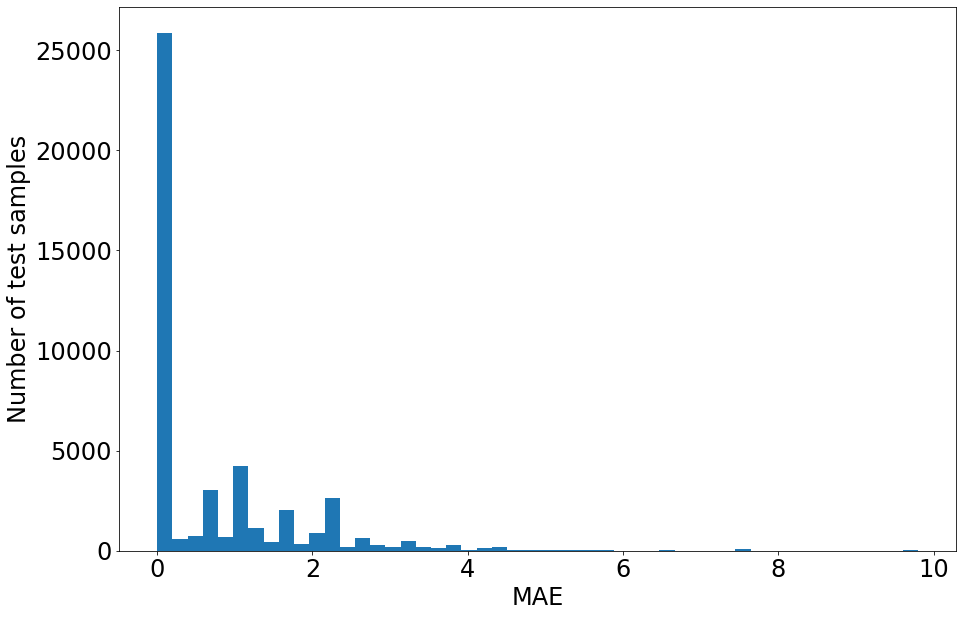

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))
n, bins, patches = plt.hist(mae, bins=50)
plt.xlabel('MAE', fontsize=24)
plt.ylabel('Number of test samples', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
#plt.savefig('', bbox_inches = 'tight')
plt.show()



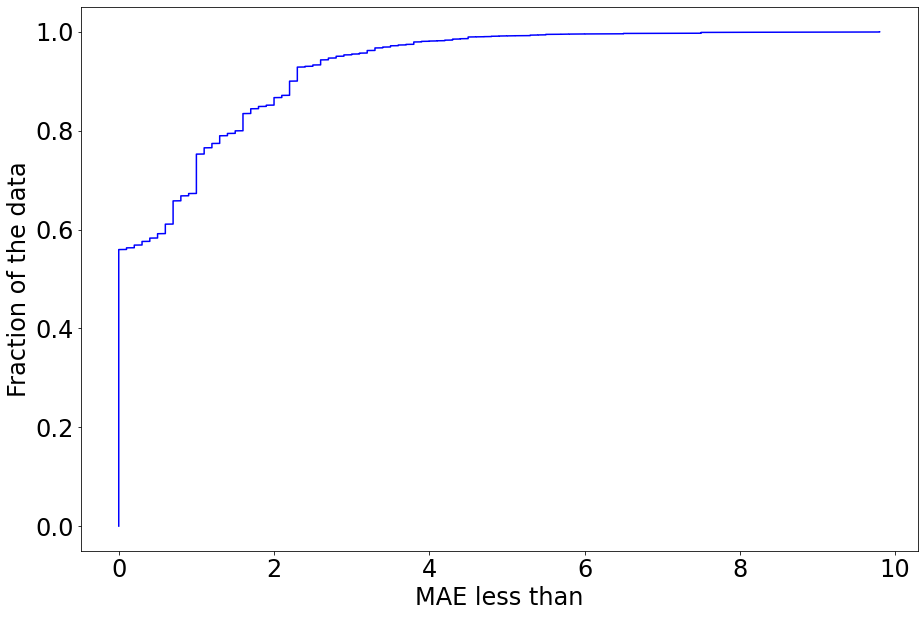

In [103]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

mae_sorted, samples = ecdf(mae)


%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(mae_sorted[:], samples[:], color='blue')
#plt.hlines(0.9, 0, 42, colors='r', linestyles='solid')
#plt.vlines(42, 0, 0.9, colors='r', linestyles='solid')
#plt.axis([0, 150, 0, 1])
plt.xlabel('MAE less than', fontsize=24)
plt.ylabel('Fraction of the data', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
#plt.savefig('', bbox_inches = 'tight')
plt.show()

In [104]:
print("55.3%:", np.percentile(mae_sorted, 55.3), "75%:", np.percentile(mae_sorted, 75))

55.3%: 0.0 75%: 1.0000000000000009


In [41]:
from scipy import stats

stats.percentileofscore(mae, 0)

27.690197273875366

In [43]:
#Khazaei et al. 2016, error rate for CVSS class
import math

true_discretized_scores = [int(math.floor(i)) for i in true_base_scores]
for i in range(0, len(true_discretized_scores)):
    if true_discretized_scores[i] == 10:
        true_discretized_scores[i] = 9

predicted_discretized_scores = [int(math.floor(i)) for i in predicted_base_scores]
for i in range(0, len(predicted_discretized_scores)):
    if predicted_discretized_scores[i] == 10:
        predicted_discretized_scores[i] = 9



for i, j in zip(true_discretized_scores, predicted_discretized_scores):
    print(i, j)

5 5
9 9
5 5
5 6
5 9
7 7
9 9
7 5
9 7
9 7
5 7
7 7
8 9
9 9
8 8
7 8
7 7
6 7
6 6
5 6
6 6
9 9
7 7
6 6
9 9
7 7
7 7
6 6
6 4
6 6
5 5
5 7
7 7
5 5
9 9
7 7
9 8
9 9
5 5
7 5
4 7
7 7
6 5
7 7
7 6
5 8
6 6
5 6
8 8
9 9
5 7
6 6
9 9
6 7
7 7
7 7
5 7
5 7
5 5
4 4
6 6
8 8
7 7
7 8
7 8
9 8
8 9
7 7
7 7
8 8
5 4
6 8
8 8
9 8
6 6
8 8
4 4
6 6
6 6
8 8
7 7
8 7
6 8
6 6
9 9
8 8
3 6
5 7
8 8
7 7
7 7
7 5
7 8
5 5
5 6
4 8
7 9
7 7
6 6
5 4
5 5
6 9
6 6
7 8
6 7
7 8
6 4
7 8
8 9
5 6
7 9
7 7
7 7
8 8
8 8
5 5
7 6
7 7
7 7
9 9
6 6
7 7
7 7
6 5
5 5
7 7
7 7
5 7
7 7
9 9
7 7
5 7
8 8
5 6
7 6
7 7
9 7
5 4
8 8
7 7
6 6
6 7
8 8
8 8
7 7
7 7
7 8
9 8
7 7
5 6
6 7
9 9
9 9
5 5
5 4
5 5
7 7
6 6
7 6
5 5
8 8
6 6
5 5
6 5
8 8
8 8
5 5
8 9
9 9
7 7
8 9
6 5
9 8
7 7
9 9
5 7
8 8
7 8
6 5
9 8
8 8
6 6
4 8
7 9
6 6
6 6
4 4
5 5
7 7
8 8
7 4
9 9
8 7
9 8
6 5
6 6
7 7
5 7
6 6
3 8
6 6
9 9
8 7
9 9
9 9
7 6
7 7
9 8
4 4
5 4
4 5
8 7
7 7
7 7
5 7
7 7
3 7
8 8
9 8
6 7
5 5
7 7
8 5
4 6
6 6
4 4
6 6
6 6
7 7
7 7
8 8
7 7
7 7
6 4
7 7
8 8
9 9
7 9
7 7
7 7
8 8
8 8
5 7
6 7
6 7
5 5
7 7
7 7
6 8
7 7


4 6
9 8
7 9
6 5
5 8
7 7
7 7
6 7
7 8
9 9
6 8
7 7
8 8
7 7
7 7
7 7
8 9
8 9
5 7
5 5
7 7
7 9
7 7
7 5
9 9
4 4
6 7
7 7
9 9
7 7
4 4
6 6
5 5
4 4
5 5
6 6
5 5
8 8
6 6
6 4
7 7
7 7
8 8
5 4
7 7
8 8
5 5
8 8
6 5
7 7
6 8
8 8
9 9
9 9
7 9
6 6
4 4
6 6
4 4
6 6
9 7
5 5
7 8
8 8
7 9
8 9
6 6
9 7
7 7
9 9
4 6
5 8
4 4
9 7
5 5
9 7
7 7
6 6
7 7
7 6
5 5
6 6
7 7
5 5
7 8
7 7
7 0
7 7
5 5
7 7
5 7
9 9
7 7
4 4
8 8
5 5
7 8
9 8
7 9
6 9
7 7
5 8
6 6
9 9
9 9
5 5
7 7
6 6
7 7
9 7
6 6
5 7
6 6
7 7
9 9
7 7
6 7
7 7
8 9
6 6
6 6
9 8
5 6
6 6
3 4
6 6
9 9
6 6
3 8
7 7
7 4
8 9
7 7
7 7
6 6
4 4
4 4
6 6
6 6
6 4
3 9
9 9
8 8
7 7
6 7
6 5
5 7
6 6
4 6
9 9
9 9
9 8
7 7
7 7
5 7
7 7
7 7
6 6
8 6
4 4
8 8
4 4
4 4
7 7
7 7
9 8
7 7
9 7
8 8
5 6
6 6
4 4
9 9
8 8
8 8
7 7
6 8
7 9
9 9
9 9
6 6
7 9
7 7
7 7
6 5
9 9
6 6
8 8
7 7
8 8
9 8
6 4
6 6
5 5
9 7
7 7
5 8
4 6
7 7
7 7
6 6
7 7
8 8
9 9
4 6
4 6
7 7
7 7
5 5
6 4
9 9
9 9
7 8
5 5
8 8
4 6
5 7
7 7
6 7
9 8
8 8
8 8
8 8
7 6
9 9
9 9
9 8
7 9
6 8
6 6
8 8
8 8
7 7
7 7
5 6
7 7
8 8
9 9
8 9
5 5
7 7
4 4
7 7
7 5
4 4
5 7
8 9
7 7
6 6
9 9


8 8
8 7
5 5
6 6
8 6
7 8
5 6
7 6
6 6
7 6
5 4
7 9
9 7
9 9
9 9
9 7
8 8
7 7
7 9
8 8
9 8
6 7
8 8
9 9
6 8
8 4
8 8
4 4
9 8
8 8
6 7
9 8
7 7
4 5
8 8
7 9
4 6
7 9
5 6
7 6
6 6
7 7
9 9
9 9
4 6
5 5
6 7
6 6
6 6
8 8
3 8
9 7
8 7
7 7
5 8
6 6
7 7
8 9
6 8
5 6
6 6
7 7
7 7
9 7
6 4
6 6
7 7
5 5
9 9
3 3
9 9
8 8
7 7
8 8
6 5
5 6
7 7
9 9
5 5
8 8
9 9
6 5
8 8
8 0
7 7
4 6
7 7
9 9
6 5
9 9
8 5
9 9
9 8
6 6
8 9
6 9
6 0
7 7
7 7
5 5
4 4
9 9
5 5
5 5
6 6
9 9
6 6
7 7
6 6
4 7
6 6
7 8
5 5
9 7
6 8
7 7
9 9
8 7
7 7
6 6
6 7
6 6
3 7
8 8
7 7
7 7
7 7
9 9
7 8
7 7
4 5
5 5
5 5
4 6
7 7
6 6
7 7
7 7
7 6
7 7
6 6
9 9
8 8
7 9
9 8
4 2
7 7
5 5
9 7
5 5
9 9
7 7
5 5
8 6
9 9
5 5
6 7
9 9
4 6
6 6
8 8
7 7
9 9
7 6
4 4
7 7
8 8
7 7
9 9
6 6
8 9
7 9
6 8
8 9
6 7
5 4
7 7
5 7
4 4
8 9
5 6
8 8
5 4
6 7
7 7
6 7
7 7
4 5
9 9
3 8
9 8
8 8
5 5
6 6
6 6
7 7
8 8
4 4
7 5
5 5
9 9
8 8
5 4
6 6
7 7
6 8
9 9
9 9
4 4
6 5
6 6
8 9
6 6
7 7
4 4
7 7
5 5
8 8
6 6
4 4
7 7
7 7
9 9
7 7
6 6
7 9
7 7
6 6
5 8
7 9
5 5
8 7
6 6
4 8
4 5
7 7
6 7
4 4
9 9
4 4
5 7
4 5
6 6
7 7
3 5
7 6
9 8
7 7
8 8
7 7


5 6
3 3
8 8
8 9
4 4
7 7
7 7
7 9
9 9
9 9
8 9
5 4
5 5
4 4
7 7
9 9
7 7
6 6
6 6
6 6
4 6
7 8
8 8
9 9
6 6
6 6
4 4
6 6
8 8
5 5
7 9
4 4
7 6
7 8
7 7
7 7
7 7
9 9
9 9
5 5
8 8
5 5
7 5
4 6
8 8
8 8
7 7
6 7
6 6
6 8
9 9
7 7
6 6
8 8
6 8
5 9
7 7
3 7
9 9
8 8
6 6
7 8
7 8
6 6
4 6
7 7
9 9
6 6
7 7
6 6
4 4
6 6
6 7
5 4
4 7
6 9
7 7
5 4
7 7
7 8
8 8
9 7
4 4
8 9
9 9
9 7
7 6
6 6
6 8
8 4
8 8
6 6
7 7
9 7
6 5
9 9
7 7
7 9
5 9
6 6
9 9
9 9
7 6
7 8
4 7
9 9
9 9
7 7
8 8
6 6
7 7
9 9
8 8
7 9
9 9
7 9
9 9
8 8
7 7
5 5
6 5
6 9
6 4
8 9
8 8
6 7
4 4
7 9
6 6
4 4
5 5
6 6
6 6
6 6
7 8
6 7
7 7
8 8
6 6
6 6
9 9
6 7
7 8
6 8
9 8
5 5
6 6
7 7
6 7
7 8
5 6
5 7
7 7
7 7
9 9
8 8
5 6
7 7
5 9
7 8
7 7
9 9
6 5
9 9
6 6
8 8
7 7
9 9
7 7
7 7
7 7
9 8
8 9
5 5
9 9
4 4
8 8
4 4
8 8
6 8
4 4
7 7
9 7
5 5
6 7
7 7
8 9
7 7
6 6
7 6
7 5
9 9
9 9
8 8
8 5
6 6
8 8
9 3
7 7
7 6
8 8
8 8
5 7
7 8
9 8
8 8
4 6
8 8
7 7
8 7
6 5
7 7
6 9
8 8
3 5
5 5
7 8
7 7
7 8
6 6
5 5
8 8
7 7
9 9
5 5
6 6
9 9
8 8
9 9
7 7
7 7
7 7
7 7
8 8
5 6
5 5
6 7
7 7
8 9
6 6
8 9
8 8
7 7
7 7
9 8
5 7
5 5
8 8
8 8
6 9


8 8
9 7
9 9
7 7
9 9
7 9
4 4
9 9
6 6
9 9
9 9
8 8
6 6
8 8
5 5
8 7
9 9
9 6
7 8
5 5
6 5
4 4
6 6
7 7
9 9
7 7
7 7
6 6
7 8
4 4
7 7
8 8
5 6
4 4
6 5
6 8
5 3
9 9
7 7
6 4
8 9
5 5
9 5
9 9
7 7
6 6
5 5
4 8
7 7
4 4
9 9
5 5
9 9
9 9
9 9
7 7
8 6
7 7
7 7
9 9
7 7
7 7
4 4
7 5
5 6
4 4
9 9
7 7
3 3
6 6
4 4
7 7
7 6
6 7
7 7
9 9
7 7
7 7
8 8
9 9
7 7
6 6
7 7
9 9
5 5
9 6
7 7
9 9
5 8
8 8
4 4
7 7
4 8
9 9
5 5
6 6
6 6
8 8
6 4
8 8
6 5
3 7
6 8
5 5
6 7
5 7
7 7
6 7
6 6
7 7
9 9
9 7
8 8
9 9
6 6
7 8
7 7
5 4
8 8
7 8
5 5
5 9
7 7
6 9
7 7
6 6
6 5
8 8
8 7
8 8
7 8
8 8
8 8
9 9
8 8
9 6
9 7
5 5
7 7
8 7
4 4
8 4
7 7
5 5
9 9
6 6
5 5
7 7
6 6
7 9
5 6
7 7
7 7
8 8
7 7
6 6
9 7
9 9
8 7
7 9
7 7
6 7
6 6
8 8
6 7
6 6
8 8
6 8
9 8
9 9
7 7
8 8
7 7
7 8
5 5
6 6
5 5
4 4
9 9
5 5
6 8
8 5
4 4
7 8
6 6
6 7
6 4
6 6
8 6
4 7
7 7
7 7
7 7
9 7
7 7
9 9
6 6
7 6
9 8
7 7
7 7
5 6
4 4
4 6
5 0
6 6
7 8
8 5
6 6
7 7
7 7
4 4
9 9
5 5
6 6
5 6
6 6
9 8
9 9
7 9
7 7
5 4
8 8
8 8
6 5
9 7
7 8
7 7
8 9
5 7
7 7
7 7
9 9
8 8
7 7
8 9
9 8
8 8
7 7
5 5
4 4
9 9
8 9
4 6
7 7
8 8
8 8
5 6
7 7
9 9


8 8
6 6
7 7
5 6
7 7
9 9
9 6
7 5
5 4
7 7
9 8
7 9
8 9
6 4
8 8
7 7
6 6
7 8
4 4
7 7
4 7
6 6
7 7
7 7
6 6
7 7
6 6
8 5
7 7
7 9
7 8
9 9
6 6
6 6
5 5
7 7
6 6
5 5
5 7
9 9
4 4
9 9
7 8
7 7
7 7
7 7
7 9
7 7
6 6
7 7
4 6
6 6
8 9
7 9
4 4
9 9
5 5
6 6
9 9
7 7
7 7
5 5
9 8
7 6
9 9
6 6
7 9
6 6
5 5
7 7
8 8
6 7
7 7
7 7
9 9
6 6
7 7
5 5
7 7
5 6
6 7
5 9
9 7
4 4
7 8
8 8
6 9
9 9
7 7
6 6
5 4
4 5
7 7
5 5
9 9
7 7
4 9
5 5
8 8
5 5
8 8
7 9
9 9
9 8
6 6
8 8
6 7
9 9
6 6
8 9
4 6
5 4
5 8
5 0
7 5
4 4
9 9
6 6
9 9
4 8
6 7
6 6
8 8
7 7
7 7
9 9
7 7
7 7
4 4
7 9
7 9
7 5
7 7
5 5
6 7
5 5
3 8
5 8
6 6
7 7
7 7
6 6
5 7
8 8
5 7
7 7
4 4
6 7
6 7
8 8
5 7
5 9
6 6
7 7
8 8
7 7
6 6
7 5
5 5
5 5
8 6
9 9
6 8
7 9
6 6
4 4
7 6
8 8
7 7
9 9
9 9
9 8
4 4
5 9
5 5
8 8
7 7
5 7
5 5
6 6
7 7
6 8
5 5
5 5
6 7
4 7
4 4
9 9
8 8
8 9
7 7
4 6
6 6
8 8
7 7
9 9
6 6
6 5
5 7
8 9
7 7
7 7
7 7
7 9
7 7
5 5
7 7
7 7
5 7
5 5
5 4
7 7
7 7
9 9
8 8
9 9
7 7
7 7
7 7
7 7
9 9
8 8
9 7
6 6
4 6
8 8
4 4
7 8
9 7
8 8
6 6
9 8
8 8
9 9
7 9
2 7
7 7
8 8
7 7
8 8
8 8
7 7
9 9
4 4
7 9
7 7
7 7
5 9
7 7
7 7


9 9
7 8
9 9
8 8
8 8
4 8
7 7
9 9
6 5
7 7
5 7
7 7
5 0
6 4
9 9
6 9
9 9
7 6
5 7
6 7
7 9
5 5
8 8
8 7
5 5
6 6
5 5
3 3
5 7
6 6
7 7
5 5
6 6
7 0
6 5
4 7
7 7
8 7
6 6
7 7
8 9
7 8
6 6
5 5
4 6
6 5
4 5
3 8
8 8
5 5
6 8
5 7
5 5
6 5
7 8
8 8
5 7
6 6
4 7
7 7
2 6
7 7
7 8
9 9
8 9
4 5
7 7
7 8
7 5
7 7
8 8
8 8
5 5
6 4
7 8
3 5
8 8
8 8
5 6
8 8
8 8
9 9
9 9
7 8
9 9
5 5
7 7
5 5
7 7
9 8
3 5
6 6
6 6
7 8
7 7
7 6
9 9
7 7
4 6
7 7
8 8
8 7
7 5
9 9
4 6
4 4
9 9
9 8
7 7
5 5
6 7
7 7
7 7
9 9
8 8
3 5
5 5
6 6
7 9
9 9
7 7
6 6
8 8
4 4
9 9
9 9
3 9
6 7
9 9
7 7
8 9
6 6
4 4
6 6
4 4
7 7
8 8
8 8
9 9
6 6
5 4
7 7
7 7
8 8
6 6
5 5
5 5
5 4
6 6
4 6
5 4
7 7
7 7
6 9
9 9
7 7
9 9
8 8
9 8
4 6
7 7
8 6
7 7
8 7
6 6
6 6
8 8
6 5
5 5
4 4
5 4
7 7
7 7
9 9
7 7
4 4
7 8
3 3
6 8
7 7
6 4
8 5
7 7
7 7
5 5
6 7
5 5
7 7
9 9
5 7
7 7
4 4
6 6
6 6
6 6
6 6
6 6
7 7
5 7
9 7
9 7
5 5
5 5
9 9
5 6
6 8
4 4
6 6
7 7
6 4
4 4
6 7
5 4
6 6
6 6
9 9
9 9
6 6
8 6
9 7
8 7
7 9
7 7
6 6
7 7
9 8
6 6
6 8
5 5
7 7
7 7
6 5
8 9
9 9
8 8
7 7
7 7
9 7
9 9
9 8
7 7
8 8
4 2
7 7
6 6
7 8
6 6
4 4
6 7
7 7


5 7
9 9
9 9
6 6
7 8
4 8
5 6
6 7
6 4
4 6
6 8
8 9
5 5
5 9
8 6
5 6
6 4
8 8
8 8
6 6
7 9
6 7
7 9
6 6
6 9
6 6
5 4
9 8
5 6
8 8
7 7
8 9
7 7
7 7
8 8
8 7
3 3
9 9
7 7
5 9
5 5
9 9
7 5
6 6
7 7
7 8
7 7
9 9
5 9
8 7
7 9
3 3
9 9
9 9
9 9
8 7
7 9
8 8
7 0
4 8
9 9
4 6
8 8
6 5
7 7
4 8
4 4
7 6
8 8
9 9
9 9
8 8
5 5
7 7
7 7
6 9
7 8
8 8
6 6
7 7
6 6
7 7
6 6
5 7
9 7
6 6
7 7
4 6
9 9
7 7
5 5
7 8
6 6
7 7
4 4
6 8
6 4
8 9
6 6
9 9
6 6
5 7
7 7
5 7
5 5
6 6
8 8
7 9
4 4
5 5
4 4
5 7
9 4
5 5
6 8
7 7
5 9
6 6
7 0
8 8
9 7
6 6
4 3
7 7
6 6
4 6
7 7
5 4
8 9
9 8
8 8
7 7
6 6
7 7
8 8
9 9
6 6
6 5
6 4
8 9
9 7
7 7
5 5
3 5
5 9
9 8
7 7
7 7
5 5
6 5
4 7
6 6
8 8
8 8
5 5
6 5
7 8
5 7
6 8
5 6
6 6
8 9
8 7
8 9
9 9
8 9
7 7
5 7
6 7
8 7
9 9
7 8
9 8
5 5
8 8
4 4
7 7
7 8
8 9
6 6
4 4
7 7
8 9
7 8
7 9
7 7
5 8
7 7
9 8
9 8
7 9
6 6
7 7
7 7
6 9
7 9
9 9
4 7
7 7
4 4
7 7
6 6
7 7
6 8
7 7
9 8
5 9
7 7
8 8
7 7
9 9
5 6
9 8
7 7
6 4
7 7
9 9
7 7
7 8
6 9
7 7
6 6
7 8
5 7
8 8
7 7
7 7
9 9
6 6
8 6
6 5
7 7
7 7
5 8
6 6
9 9
7 8
7 7
9 9
6 6
7 7
8 6
6 6
6 6
7 6
5 7
6 6
4 5
7 8
8 8


5 7
8 8
6 6
8 8
7 7
7 7
6 6
6 6
5 5
9 9
8 7
5 5
5 5
3 2
5 4
7 7
4 7
9 9
6 5
6 7
7 5
7 7
4 4
9 9
2 2
7 7
3 0
9 9
4 4
7 7
8 8
7 7
7 9
8 6
5 6
4 6
7 7
6 6
6 6
5 5
5 5
5 5
7 7
4 4
4 6
8 8
7 4
5 5
8 8
8 8
4 4
6 4
5 4
8 8
9 8
8 8
6 4
9 9
4 4
6 6
7 7
9 8
5 6
2 7
5 8
7 7
7 7
9 9
7 7
8 8
9 6
7 7
7 7
6 6
7 7
5 7
4 4
6 8
7 8
6 6
5 7
7 7
6 8
6 8
6 8
7 7
8 8
8 8
8 7
8 8
6 8
9 9
9 9
7 9
7 7
6 6
7 8
8 8
7 9
9 9
6 8
9 8
8 8
5 7
6 7
7 7
6 6
7 8
6 8
6 6
5 5
7 7
8 8
7 7
6 7
9 9
9 9
6 7
9 9
4 6
7 8
9 9
5 5
7 7
8 8
5 6
8 8
4 5
6 6
8 8
7 7
7 7
6 7
9 8
8 7
8 8
7 9
6 6
5 9
7 7
6 8
7 6
6 7
6 9
8 9
4 9
5 5
7 7
7 7
9 8
6 7
9 9
8 8
8 8
7 8
9 9
8 8
7 7
4 4
7 7
7 7
8 8
9 9
8 8
7 9
6 6
6 6
4 4
7 9
7 7
9 9
8 8
9 9
8 8
4 4
7 7
8 8
8 8
6 6
7 7
6 7
9 9
7 7
6 6
5 6
8 8
7 8
6 6
3 7
7 7
7 7
5 3
8 8
5 6
7 7
9 9
7 7
9 9
5 7
9 7
8 7
9 9
7 7
7 8
8 8
5 5
6 6
6 8
6 7
8 7
7 7
4 6
7 7
8 8
7 7
5 7
7 8
8 8
5 4
5 4
8 9
9 9
5 5
9 8
7 9
8 8
7 7
7 7
5 5
5 7
7 7
8 8
5 7
5 5
6 6
6 6
8 6
7 7
7 9
7 8
5 6
9 4
8 8
4 4
8 8
5 7
8 8
5 9
8 8
6 4


In [44]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = np.array(true_discretized_scores)
y_pred = np.array(predicted_discretized_scores)

print("accuracy: ", accuracy_score(y_true, y_pred))
print("precision: ", precision_score(y_true, y_pred, average='weighted'))
print("recall: ", recall_score(y_true, y_pred, average='weighted'))
print("f1 score: ", f1_score(y_true, y_pred, average='weighted'))


print("confusion matrix: ")
print(confusion_matrix(y_true, y_pred))

accuracy:  0.6098941775900362
precision:  0.6176854449383031
recall:  0.6098941775900362
f1 score:  0.6083154116717929
confusion matrix: 
[[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   4    2   20    5   27   12   18   15    5    3]
 [   8    0    1   78   16   75   25   49   19   15]
 [  18    0    8    9  788  199  294  154  115   44]
 [  36    0    3   27  191 1583  537  647  180  207]
 [  15    0    1    8  229  399 2409  486  452  190]
 [  44    0    1    5   55  202  350 4379  700  699]
 [   7    0    0    1   34   50  144  337 2389  572]
 [   9    0    0    2    9   32   68  319  570 2359]]


/home/mshahid/ml/my_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#Z Han et al. 2017 severities

from cvss import CVSS3

true_severities = [CVSS3(i).severities()[0] for i in true_cvss_vector_strings]
predicted_severities = [CVSS3(i).severities()[0] for i in predicted_cvss_vector_strings]

for i, j in zip(true_severities, predicted_severities):
    print(i, j)

Medium Medium
Critical Critical
Medium Medium
Medium Medium
Medium Critical
High High
Critical Critical
High Medium
Critical High
Critical High
Medium High
High High
High Critical
Critical Critical
High High
High High
High High
Medium High
Medium Medium
Medium Medium
Medium Medium
Critical Critical
High High
Medium Medium
Critical Critical
High High
High High
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium High
High High
Medium Medium
Critical Critical
High High
Critical High
Critical Critical
Medium Medium
High Medium
Medium High
High High
Medium Medium
High High
High Medium
Medium High
Medium Medium
Medium Medium
High High
Critical Critical
Medium High
Medium Medium
Critical Critical
Medium High
High High
High High
Medium High
Medium High
Medium Medium
Medium Medium
Medium Medium
High High
High High
High High
High High
Critical High
High Critical
High High
High High
High High
Medium Medium
Medium High
High High
Critical High
Medium Medium
High High
Medium Medium
Medium

Medium High
High High
Critical Critical
Critical Critical
Medium High
High High
Medium Medium
Medium High
Critical Critical
Medium High
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium High
High High
High High
High High
High Medium
High High
High High
Medium Medium
High Medium
High Medium
Critical High
Critical High
High Critical
Critical Critical
Medium Medium
High High
High Critical
Medium Medium
High High
High Medium
Medium Medium
High High
High High
Critical High
High High
Medium High
Critical Critical
Medium Medium
High High
Medium Medium
Critical High
Medium Medium
High High
High High
Medium Medium
Critical Critical
High High
Critical Critical
High High
Medium Medium
High High
High High
Medium High
High High
Medium Medium
Medium High
High Medium
High High
High High
Medium Medium
Critical Critical
High High
High High
High High
Medium High
Medium Medium
Medium High
High Medium
High Medium
High High
High High
Medium Medium
Medium Critical
Critical Critical
High High
Me

Low Medium
Medium Medium
Medium Medium
Medium Medium
Critical Critical
High Critical
Medium Medium
Critical Critical
Medium Medium
Medium Medium
High High
Medium Medium
Medium Critical
Critical High
High Critical
High High
Critical Critical
Medium Medium
High High
Medium High
Medium High
Medium Medium
High Medium
Medium Medium
Medium Medium
High Medium
High High
High High
High High
High High
Medium Medium
Medium Medium
High Medium
High High
Low Medium
Medium Medium
Medium Medium
Medium Critical
Medium Medium
Medium Medium
Medium Medium
Medium Medium
High High
Critical High
Medium Medium
High Critical
High High
High High
Medium Medium
High Critical
Medium High
High Critical
Low Medium
High Critical
Critical Critical
Medium Medium
High High
Medium High
High High
Critical Critical
High Critical
Medium Medium
High High
High High
High Medium
High High
High High
High High
Critical Critical
High High
Critical High
Low Low
Critical High
Medium Medium
Medium High
Medium Medium
Medium Medium
Hig

Medium Medium
High High
Medium Medium
High Critical
High Critical
Medium High
Medium Medium
Medium Medium
Medium High
High High
Medium High
High High
Medium High
Medium Medium
Critical Critical
Medium Medium
High High
High High
Critical Medium
Medium Medium
High High
High High
High High
High High
High High
Medium High
Medium Medium
High High
Medium High
Critical Critical
Medium Medium
Critical Critical
Medium Medium
Critical Critical
High High
Critical Critical
Critical Critical
High High
Critical Critical
Medium Medium
Medium Medium
Low High
Medium Medium
Critical Critical
Medium Medium
High High
Critical Critical
Critical Critical
High Critical
Medium High
High Medium
Medium Medium
High High
Medium Medium
Medium Medium
Medium High
Medium Medium
High High
Medium High
Medium Medium
High High
High High
High High
High High
High Critical
High High
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium Medium
High High
Critical Critical
Medium High
High High
Low High


Medium Medium
High Critical
High High
Medium Medium
Medium Medium
Critical High
Medium Critical
High High
Critical Medium
Medium Medium
Medium Medium
High High
Critical High
High Critical
Medium Medium
Medium Medium
High High
High High
Medium Critical
Medium Medium
High High
High High
High High
High High
High Critical
High High
Critical Critical
Low High
Critical Critical
High High
Medium Medium
High Medium
Medium Medium
Medium Medium
High High
Critical Critical
High High
Medium High
Medium Medium
High High
High High
High High
High High
High High
High High
Medium Medium
High High
Medium Critical
High None
Critical Critical
Medium Medium
Critical High
Critical Critical
High High
High High
High High
High Medium
Critical Critical
High High
High High
High High
Critical Critical
High High
High High
High Medium
Medium Medium
Critical High
Medium Medium
Medium Medium
High High
Medium Medium
High High
Medium Medium
High High
Medium Medium
Medium Medium
High High
Medium Medium
Medium High
Mediu

Critical High
Medium Medium
Critical High
High High
Medium Medium
High High
High High
Critical Critical
Critical Critical
High High
Critical Critical
High Critical
Critical Critical
High High
Medium Medium
Medium Medium
Medium Medium
High Critical
High Critical
Medium Medium
High High
High High
High Medium
Critical Critical
High Medium
High Medium
High High
High Medium
High High
Medium High
Medium Medium
Medium High
Medium Medium
High Critical
High High
High High
Medium Medium
Critical High
High High
Critical Critical
High High
Medium Medium
Medium Medium
Medium High
High High
Medium Medium
Medium Low
High Critical
High High
Medium Critical
Medium Medium
Critical Critical
Medium Medium
Critical Critical
Critical Critical
Medium Medium
Critical Critical
High High
Medium Medium
Medium Medium
Medium Medium
Medium High
Medium Medium
High High
Medium Medium
Medium Medium
Medium High
Medium Medium
High Critical
Medium High
High High
High High
High High
Medium Medium
Medium Medium
Critical Hi

High High
High High
Medium Medium
Medium Critical
Medium Medium
High High
Medium Medium
Medium Medium
High High
Critical Critical
High High
Medium Medium
Medium Critical
Critical High
High High
Low Low
High High
High High
High High
High High
Critical High
High High
Medium Medium
Medium Medium
Medium Medium
Medium Medium
High High
High Critical
High High
High High
High High
High High
High High
High High
High High
High High
High High
Medium None
Medium High
Medium Critical
Medium Medium
High Critical
Critical Critical
Low Medium
High High
High High
Medium High
Low Low
High High
High High
Medium Medium
High Critical
Critical Critical
High High
High Critical
High High
Medium Medium
High High
Medium Medium
Medium Medium
Medium Medium
Critical Critical
Medium Medium
Medium Medium
Medium None
Medium Medium
Medium High
Critical High
Medium Medium
Critical Critical
Medium High
High High
Medium Medium
Medium High
Critical Critical
Medium High
High High
Medium Medium
Medium Medium
Medium Medium
H

High High
Critical High
High High
High High
High High
High High
High High
Medium Medium
Medium Medium
Medium Medium
High High
Medium High
High High
Critical Critical
Medium Medium
Critical Critical
High High
High High
High High
Critical Critical
Medium Medium
Critical Critical
Medium Medium
Medium Medium
Critical High
High High
Critical Critical
High High
Critical Critical
Medium Medium
High High
High High
High High
Medium Medium
High High
High High
High High
High High
High High
Medium Medium
Medium Medium
Medium Medium
High High
Critical Critical
High High
High High
High High
Critical Critical
High High
Medium Critical
High High
Medium Medium
High High
Medium High
Medium Medium
Medium Medium
High High
High Medium
High Medium
Medium Medium
Medium Medium
Medium High
High High
Low Low
Medium High
High High
Medium High
Medium High
Critical Critical
Critical Critical
High High
Critical High
Medium Medium
Medium Medium
Low Medium
High High
High High
Medium Medium
High Medium
Medium Medium
C

High Critical
Medium Medium
Medium Medium
Medium Medium
High Critical
Critical Critical
High Critical
Critical Critical
High Critical
Medium Medium
High Critical
Critical High
High High
Medium Medium
Medium Medium
Medium Medium
High High
Medium Medium
Medium Medium
High Medium
Critical Critical
Medium Medium
Medium Medium
Medium Medium
Medium Medium
High Critical
Medium Medium
Medium Medium
Medium Medium
Medium Critical
High Critical
Medium Medium
Medium High
Medium Medium
High Critical
High High
Critical Critical
High High
Medium Medium
Medium Medium
Medium Medium
High High
Medium Medium
Medium High
High Medium
Medium High
Medium Medium
Medium None
High High
High High
High High
Medium Medium
Medium None
High Critical
High High
High High
Medium High
Medium High
Medium Medium
High None
High High
Critical Critical
High High
Critical Critical
Critical Critical
High High
Medium Medium
High High
Critical Critical
High High
Medium Medium
Critical Medium
Medium High
High High
Medium High
Medi

Medium Medium
High High
Medium Critical
Medium High
Medium Medium
High Critical
High High
Critical Critical
High High
Medium High
Critical Critical
High High
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium High
High Critical
Medium Medium
Critical Critical
Critical Critical
Medium Medium
High High
Medium High
Medium High
High High
Medium Medium
Critical High
Critical Critical
Medium Medium
Critical Critical
Critical High
Medium High
High High
Medium Medium
High High
Medium Medium
Medium Medium
Medium Medium
High Critical
High High
Low Medium
High High
Medium Medium
Critical Critical
High High
Medium Medium
Critical Critical
High High
High High
Medium Medium
High High
High High
Critical Critical
High High
Critical Critical
High High
Medium High
High High
Critical Critical
Critical High
High High
Medium Medium
High High
Critical Critical
High High
Critical High
High High
Medium High
Medium Medium
Medium Medium
High High
High High
High High
Medium High
Medium 

High High
Medium Medium
Medium Critical
High High
High High
Medium Medium
Medium Critical
Medium Critical
Medium Medium
High Medium
High High
High High
High High
Medium High
Medium Medium
Medium High
High Medium
High High
Critical Critical
Critical Critical
Critical Critical
High High
Critical Critical
High High
Medium Medium
Medium High
Medium High
Critical High
Critical High
Medium High
High High
Medium Medium
High High
High High
High Critical
High High
Medium Medium
Medium Medium
High High
High High
Medium Critical
Medium Medium
Medium Medium
High High
Critical Critical
High High
High High
Medium Medium
High High
Medium Medium
High High
Medium High
High High
High High
Medium Critical
Medium Medium
High High
Medium High
High High
Critical Critical
Medium High
Medium Medium
High High
High High
Medium Medium
Medium Medium
Medium Medium
Critical Critical
Critical Critical
Critical High
High High
High Medium
High High
Medium Medium
Medium Medium
High High
High High
High Medium
High High


High High
Medium Medium
High Critical
Medium Medium
Medium Medium
Critical Critical
Medium Medium
High Critical
Medium Medium
Critical Critical
Medium Medium
Critical High
High High
Critical High
High High
Critical Critical
High High
High Medium
Medium High
Critical Critical
High Critical
High Critical
Critical High
High High
High High
High High
High High
High High
High High
Medium High
High High
High Critical
High High
Medium Medium
High High
Medium High
High High
Medium Medium
High High
Critical Critical
High High
Medium Medium
Medium High
High Critical
Medium High
Critical Critical
Medium Medium
High High
Medium Medium
Critical High
High High
High High
High Critical
Medium Medium
Medium Medium
Critical Critical
Critical Critical
High High
Critical Critical
High High
High High
Critical Critical
High High
High High
High Medium
High Critical
Critical Critical
Medium Medium
High High
High High
Critical High
High Medium
High High
High High
Medium Medium
High High
Medium Critical
High Hig

Medium High
Critical High
Critical Critical
High High
High High
High High
High High
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Critical Critical
Medium Medium
Medium High
High Medium
Medium Medium
High High
Medium Medium
Medium High
Medium Medium
Medium Medium
High Medium
Medium High
High High
High High
High High
Critical High
High High
Critical Critical
Medium Medium
High Medium
Critical High
High High
High High
Medium Medium
Medium Medium
Medium Medium
Medium None
Medium Medium
High High
High Medium
Medium Medium
High High
High High
Medium Medium
Critical Critical
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Critical High
Critical Critical
High Critical
High High
Medium Medium
High High
High High
Medium Medium
Critical High
High High
High High
High Critical
Medium High
High High
High High
Critical Critical
High High
High High
High Critical
Critical High
High High
High High
Medium Medium
Medium Medium
Critical Critical
High Critical
Medium Medium
High High
High

Medium Medium
Medium High
High High
High High
Critical High
High High
Critical High
Medium Medium
Medium Medium
High Critical
Medium Medium
Medium Medium
High High
Medium Medium
Medium Medium
High High
High High
Medium High
Critical Critical
Medium Medium
High High
Medium Medium
High High
Medium Critical
Medium Medium
High High
High High
High High
High Medium
Medium Medium
Critical High
High High
High Critical
Critical Critical
High Medium
Medium Medium
Medium Medium
Critical Critical
Medium Medium
Medium Medium
Critical High
High High
Critical Critical
High High
Critical Critical
High High
High High
Medium Medium
Critical Critical
Medium Medium
Critical High
High Critical
Medium Medium
Medium High
High High
Critical Critical
High High
High High
Medium Medium
High High
Medium Critical
High High
High High
High Medium
High High
Medium Medium
High High
Medium Medium
High Critical
Critical Critical
Medium Medium
Medium Critical
Medium Medium
Medium High
Medium Critical
Medium High
Medium M

High High
Medium Medium
High High
Medium Medium
Medium Medium
High High
Medium Medium
Medium High
High High
High High
Critical Medium
Critical Critical
Medium Medium
High High
Critical Critical
High High
High Critical
Medium Medium
High Medium
Medium Medium
High High
Critical High
Medium Medium
High Medium
Medium High
High High
Medium Medium
Medium Medium
Medium Medium
Critical Critical
Medium Medium
Medium Medium
Medium Medium
Critical Critical
Medium Medium
Medium Medium
Medium Medium
High Critical
Medium Medium
High High
Critical High
High Critical
Medium Medium
Medium Medium
Medium Medium
High High
Medium High
High High
High High
High High
Medium Medium
High High
Medium Medium
Medium High
High High
Medium Medium
Critical Critical
Medium Medium
High High
High High
Critical Critical
Medium Medium
Critical High
High Medium
Medium Medium
Medium Medium
Medium High
High High
Medium Medium
Critical Critical
High High
Critical Critical
Critical Critical
High High
Medium High
Medium High
Cr

High Critical
Medium Medium
Critical Critical
Medium Medium
Medium Medium
Critical Critical
High High
High High
Medium Medium
Critical High
High Medium
Critical Critical
Medium Medium
High Critical
Medium Medium
Medium Medium
High High
High High
Medium High
High High
High High
Critical Critical
Medium Medium
High High
Medium Medium
High High
Medium Medium
Medium High
Medium Critical
Critical High
Medium Medium
High High
High High
Medium Critical
Critical Critical
High High
Medium Medium
Medium Medium
Medium Medium
High High
Medium Medium
Critical Critical
High High
Medium Critical
Medium Medium
High High
Medium Medium
High High
High Critical
Critical Critical
Critical High
Medium Medium
High High
Medium High
Critical Critical
Medium Medium
High Critical
Medium Medium
Medium Medium
Medium High
Medium None
High Medium
Medium Medium
Critical Critical
Medium Medium
Critical Critical
Medium High
Medium High
Medium Medium
High High
High High
High High
Critical Critical
High High
High High
Me

High High
High High
Critical High
Low Medium
Medium Medium
Critical Critical
Medium Medium
Medium Medium
High Critical
High Critical
High High
Medium Medium
Low Low
Medium Medium
Critical High
Medium Medium
Medium Medium
Medium Medium
High High
Medium Medium
High High
Critical Critical
Medium Medium
High Critical
Critical High
Medium Medium
Critical High
Critical Critical
Medium Medium
Medium Medium
High High
High High
Medium Medium
Low Medium
Medium Medium
High High
Critical Critical
Medium Medium
High High
High High
Medium Medium
High Critical
Medium High
High High
High High
High Medium
High High
Medium Medium
Critical Critical
High High
Medium Medium
High High
Medium High
High High
Medium Medium
High Medium
High High
High High
Medium Medium
Medium Medium
Medium Medium
High High
High Critical
Medium Medium
High High
Critical Critical
Medium Medium
Low None
Medium Medium
Critical High
Critical Critical
High Critical
High High
Critical Critical
Medium High
High Medium
Medium Medium
Hig

Critical High
Medium Medium
High High
High High
High High
Medium Medium
High High
Medium Medium
Medium Medium
High High
High High
Medium Medium
Medium Medium
High High
Medium High
Medium Medium
Medium Critical
Medium Medium
High High
High Medium
Critical Critical
High High
High High
Medium Medium
High High
High Critical
Medium Medium
High High
High High
Medium High
Medium Medium
Medium Medium
Medium Medium
High High
High High
High High
High High
Medium Medium
High High
High Critical
High High
Medium Medium
Medium Medium
Medium Medium
Medium Medium
High Critical
High High
Medium Critical
Critical Medium
Low Medium
Medium High
High High
High High
High High
High Critical
High Critical
Medium Medium
High High
High High
Medium High
Medium Medium
Critical Critical
Medium Medium
Medium High
High High
Medium Medium
Critical Medium
High High
Medium Medium
High High
High High
High High
Medium Medium
Low High
High High
High High
High High
High High
Medium High
High High
Medium Medium
High High
Hi

Medium High
High Medium
Medium Medium
Critical High
Critical Critical
Critical Critical
Medium Low
Medium High
High High
Medium Medium
High Medium
High High
Medium Medium
Critical Critical
High Medium
Medium Medium
Medium Medium
High High
High High
High High
Medium High
Medium High
High High
High High
Critical Critical
Medium Low
Medium Medium
High High
High High
Medium Medium
Medium Medium
Medium Medium
Critical Critical
High High
Critical Critical
Critical High
High High
Critical Critical
High High
Critical Critical
High Critical
Medium Medium
Critical Critical
Medium High
High Medium
Medium Medium
Medium Medium
Medium High
High High
Critical Critical
High Medium
Medium Medium
High High
Critical Critical
High High
High High
Critical Critical
Low Medium
High High
High High
High High
Medium Medium
Critical Critical
High High
Critical Critical
High High
High High
Medium High
High High
Critical Critical
Medium Medium
High High
Medium High
High High
Medium None
Medium Medium
Critical Crit

Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Critical High
High High
High High
Medium Medium
Medium Medium
High High
Medium Medium
High High
Medium Medium
High High
Medium Medium
Critical High
High High
High High
High High
Medium Medium
High High
High High
High Medium
Medium Medium
Medium High
High High
High High
Critical Critical
High High
Medium High
Medium Medium
Critical High
Low High
Medium Medium
Medium Medium
High High
Medium Medium
High Medium
Medium Medium
High High
High High
High Medium
Medium Medium
Medium Medium
Medium Medium
Medium Medium
High Medium
High Critical
Medium Medium
Medium Medium
Medium Medium
Critical High
High High
Medium Medium
Medium Medium
Critical Critical
High High
Medium High
High Medium
Medium Medium
Medium Medium
High High
Medium Medium
High High
High High
Critical Critical
High High
High High
High High
Medium High
Critical Critical
High High
Medium Medium
High Critical
High High
Medium Medium
Medium Medium
Medium Medium
Mediu

Critical Critical
High Medium
High High
Critical Critical
High High
Medium Medium
Medium Medium
High High
High High
Medium High
High High
Critical Critical
High High
High High
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Critical High
High High
High High
Medium Medium
High High
Low Low
High High
High High
High Critical
Medium Critical
High Critical
High High
High High
High High
High High
High Critical
Medium Low
High High
Medium Medium
Critical Critical
Critical Critical
High Critical
High High
Medium Medium
High Medium
Medium Medium
High High
Medium Medium
Medium Medium
Critical Critical
Medium High
Medium High
Low Low
High High
High Medium
Medium Medium
High Medium
High High
High Critical
Medium Medium
High High
Medium Medium
High Critical
Medium Medium
Medium Medium
High High
Critical Critical
High High
High Critical
High Critical
Medium Medium
High Medium
High Critical
Medium None
Medium Medium
Critical High
Critical Critical
Medium Medium
Medium Medium
Cri

Critical Critical
High High
Medium Medium
Medium Medium
High High
Critical Critical
High Medium
Medium Medium
High High
Medium Medium
High High
Medium Medium
High High
High High
High Critical
High High
High High
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium Medium
Medium High
High High
Medium High
Medium Medium
Medium Medium
Low Medium
High High
High Critical
Medium Medium
Medium Medium
High None
Medium Medium
Critical Critical
Medium Medium
Medium Medium
Medium High
Critical High
High Medium
High Critical
Medium Medium
High Medium
Critical Critical
High High
Critical Critical
Medium Medium
High Critical
Critical Critical
Medium Medium
Medium Medium
Medium Medium
Critical Critical
High High
High High
Medium Critical
High High
Medium High
High Critical
Critical Critical
High High
Critical Critical
Critical Critical
High High
Medium Medium
High High
Critical Critical
Medium Medium
Medium High
Low Medium
High Critica

High High
High High
Medium Medium
High High
High High
High Medium
High High
Critical Critical
High High
Critical Critical
Medium Medium
Medium Medium
Medium Medium
Medium High
High High
High High
High High
Medium Medium
High High
High Medium
Medium Medium
High None
High High
Medium Medium
High High
Medium Medium
Medium High
High High
High High
High Medium
Medium Critical
Medium High
Medium Medium
High Medium
Critical High
High Critical
Medium Medium
High High
Critical Critical
High Medium
High High
High High
Critical Critical
Medium Medium
Medium Medium
Medium Medium
Critical High
Medium Medium
Medium High
High High
Medium High
Medium High
High Medium
Medium Medium
High High
High High
Medium Medium
High High
Medium Medium
High Critical
Medium Medium
Critical Medium
Medium Medium
High High
Medium Medium
High High
Critical Critical
Critical Medium
Medium High
Medium Medium
High High
Medium Medium
High High
High High
Critical Critical
High High
High High
Medium High
Critical Critical
Crit

Medium Medium
High High
Critical Critical
High High
Medium Medium
Medium High
Medium Medium
High Medium
High High
Medium High
Medium Medium
High High
Critical Critical
High High
High High
Medium High
High High
High High
High Critical
Critical Critical
Medium Medium
High High
Medium Medium
High High
Critical Critical
High High
Medium Critical
High High
Low Low
Medium High
Medium Medium
High Critical
Medium Medium
Medium Medium
High High
High High
Medium Medium
High High
Medium Critical
Critical Critical
Medium Medium
Medium Medium
High High
High High
Medium Medium
High High
High High
High High
High High
High High
Critical Critical
High High
High High
Medium Medium
Medium High
High High
High High
Medium Medium
Medium High
High Medium
Medium High
Critical Critical
Medium Medium
High High
High High
High High
High High
Medium Medium
High High
High High
High High
Medium Medium
Critical High
Medium Medium
Critical Critical
High High
Medium Medium
Critical Critical
High Medium
Medium Medium
Me

High High
Medium High
High High
Critical Critical
High High
High None
High High
High High
High High
High High
High High
High Critical
High High
Medium Medium
High Medium
Medium High
Critical Medium
High High
Medium Medium
Medium Medium
Critical High
High High
High Critical
Critical High
High Medium
Medium High
Medium Critical
Medium High
Critical Critical
High Medium
Critical Critical
Medium Medium
Critical Critical
Critical Critical
Medium High
Medium Medium
High High
High Critical
Medium Medium
High High
Medium Medium
High High
Medium Medium
Medium Medium
Critical Critical
Medium Critical
Medium Medium
High High
Critical Critical
Medium High
Medium Medium
High Medium
Medium None
Medium Medium
Medium Medium
High High
High Medium
High High
Critical High
High High
High High
High Medium
Medium Critical
Medium Medium
Low High
High High
High Critical
Medium Medium
High High
Medium Medium
High Critical
Medium Medium
Medium Medium
Medium High
Critical Critical
High Critical
Medium Medium
Hig

High High
Medium Critical
Medium Medium
Medium Medium
Critical Critical
Critical High
Critical Critical
Medium Medium
High High
Medium High
Critical Critical
High High
Low Low
High High
High High
Medium None
Critical High
Medium Medium
Medium High
Medium Medium
Medium Medium
High High
High High
Medium High
High High
High High
High Critical
Medium High
High High
High High
Critical High
Medium High
High High
Medium Critical
High High
Critical Critical
Medium Medium
Critical Critical
High High
High High
Medium Medium
High High
Critical High
Critical Critical
High High
Critical High
Medium Medium
Medium High
Critical Critical
High None
High High
Critical High
High High
Critical Critical
High High
High High
Medium High
High High
Medium Medium
Medium Medium
Critical Critical
High High
High High
Critical Critical
Critical Critical
Medium Medium
High High
Medium Medium
Critical Critical
High High
High High
High High
High High
Medium Medium
High None
Critical Critical
Medium Medium
Medium Criti

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(true_severities)
print(le.classes_)

NUM_CLASSES = len(le.classes_)
print(NUM_CLASSES)

encoded_true_severities = le.transform(true_severities)

for i in range(0, len(predicted_severities)):
    if predicted_severities[i] == 'None':
        predicted_severities[i] = 'Low'
        

encoded_predicted_severities = le.transform(predicted_severities)

['Critical' 'High' 'Low' 'Medium']
4


In [50]:
for i, j in zip(encoded_true_severities, encoded_predicted_severities):
    print(i, j)

3 3
0 0
3 3
3 3
3 0
1 1
0 0
1 3
0 1
0 1
3 1
1 1
1 0
0 0
1 1
1 1
1 1
3 1
3 3
3 3
3 3
0 0
1 1
3 3
0 0
1 1
1 1
3 3
3 3
3 3
3 3
3 1
1 1
3 3
0 0
1 1
0 1
0 0
3 3
1 3
3 1
1 1
3 3
1 1
1 3
3 1
3 3
3 3
1 1
0 0
3 1
3 3
0 0
3 1
1 1
1 1
3 1
3 1
3 3
3 3
3 3
1 1
1 1
1 1
1 1
0 1
1 0
1 1
1 1
1 1
3 3
3 1
1 1
0 1
3 3
1 1
3 3
3 3
3 3
1 1
1 1
1 1
3 1
3 3
0 0
1 1
2 3
3 1
1 1
1 1
1 1
1 3
1 1
3 3
3 3
3 1
1 0
1 1
3 3
3 3
3 3
3 0
3 3
1 1
3 1
1 1
3 3
1 1
1 0
3 3
1 0
1 1
1 1
1 1
1 1
3 3
1 3
1 1
1 1
0 0
3 3
1 1
1 1
3 3
3 3
1 1
1 1
3 1
1 1
0 0
1 1
3 1
1 1
3 3
1 3
1 1
0 1
3 3
1 1
1 1
3 3
3 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
3 3
3 1
0 0
0 0
3 3
3 3
3 3
1 1
3 3
1 3
3 3
1 1
3 3
3 3
3 3
1 1
1 1
3 3
1 0
0 0
1 1
1 0
3 3
0 1
1 1
0 0
3 1
1 1
1 1
3 3
0 1
1 1
3 3
3 1
1 0
3 3
3 3
3 3
3 3
1 1
1 1
1 3
0 0
1 1
0 1
3 3
3 3
1 1
3 1
3 3
2 1
3 3
0 0
1 1
0 0
0 0
1 3
1 1
0 1
3 3
3 3
3 3
1 1
1 1
1 1
3 1
1 1
2 1
1 1
0 1
3 1
3 3
1 1
1 3
3 3
3 3
3 3
3 3
3 3
1 1
1 1
1 1
1 1
1 1
3 3
1 1
1 1
0 0
1 0
1 1
1 1
1 1
1 1
3 1
3 1
3 1
3 3
1 1
1 1
3 1
1 1


1 1
0 0
3 3
0 1
3 3
1 1
3 3
3 3
1 1
3 3
1 1
3 1
1 1
0 0
1 1
3 3
2 0
1 1
3 1
3 3
3 3
1 0
0 0
1 1
3 3
0 0
1 1
3 1
3 1
0 0
3 1
1 1
3 1
1 1
1 1
0 0
3 3
3 1
3 3
1 1
1 0
1 1
3 1
3 1
1 1
1 1
3 3
3 1
3 3
0 0
1 1
3 1
3 3
3 3
3 3
3 1
3 1
1 0
2 3
0 0
3 3
1 1
3 1
2 3
3 3
1 1
0 0
1 1
1 1
3 1
1 1
3 3
3 3
1 0
1 1
3 3
1 3
0 0
0 0
1 1
3 3
1 1
1 1
1 1
1 1
1 1
1 1
1 1
3 3
3 3
1 1
1 1
3 3
1 1
3 1
1 3
1 2
1 1
3 3
3 3
3 3
0 1
3 3
1 1
1 1
1 0
0 0
1 1
3 3
1 0
3 0
1 1
1 0
1 3
3 1
1 1
0 1
3 3
0 0
1 1
0 0
3 3
0 0
1 1
3 3
0 0
3 3
1 1
1 1
0 2
3 3
3 3
1 1
3 3
0 0
3 3
1 1
3 3
3 3
1 1
3 0
0 1
2 3
1 3
3 3
3 3
3 3
1 1
3 3
3 3
0 1
1 1
3 3
3 1
3 3
3 3
3 3
1 1
3 3
3 3
0 1
0 1
3 3
3 3
1 1
3 1
3 0
1 2
1 1
0 0
1 1
1 1
1 1
0 3
1 1
1 1
3 0
1 0
1 1
1 3
0 0
0 0
1 1
3 3
3 3
0 0
1 1
3 1
3 3
0 1
3 3
3 3
3 1
3 2
0 1
3 1
3 3
1 1
1 3
1 1
1 1
3 3
1 0
1 1
1 0
3 1
3 3
1 1
1 2
1 1
3 3
3 1
3 3
0 0
3 3
0 1
1 1
3 3
2 3
0 0
1 1
1 1
1 3
0 0
1 1
1 1
0 0
3 3
3 3
3 3
0 0
3 0
1 1
1 1
3 3
1 1
3 0
3 3
1 1
3 3
3 1
3 1
1 0
1 0
1 1
0 0
3 1
1 1
1 1
1 1


1 1
1 1
3 1
1 0
1 1
0 0
1 1
3 3
1 1
1 1
1 1
1 1
1 1
3 3
3 3
3 3
1 3
1 1
3 3
1 0
1 1
3 3
1 1
3 3
1 1
3 3
0 0
1 1
0 0
3 3
1 1
3 3
3 3
1 1
1 1
1 1
3 1
1 1
3 3
1 1
1 1
1 1
1 0
0 0
1 1
1 1
3 3
3 1
3 3
1 1
1 1
1 1
3 3
1 1
3 3
1 1
3 3
3 1
3 3
1 1
1 1
1 1
1 1
0 1
3 1
3 3
0 0
3 3
1 1
1 1
3 3
3 3
1 3
1 1
3 1
3 1
1 1
3 3
3 3
1 1
3 3
3 3
1 1
2 1
1 1
3 0
0 0
3 3
3 3
0 0
3 3
1 3
1 1
1 1
3 1
1 1
1 2
0 0
3 3
3 3
1 1
1 1
3 3
1 3
1 0
1 1
3 3
1 1
3 3
3 3
1 1
0 0
3 3
1 0
1 1
3 1
1 1
1 1
1 1
1 1
2 2
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
3 3
1 1
3 3
1 1
1 1
3 3
3 3
1 0
3 1
1 1
3 3
3 3
3 1
1 1
1 1
3 3
1 1
3 3
1 1
3 1
3 1
1 1
1 1
3 3
3 3
0 0
3 3
3 3
2 2
1 1
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
3 3
3 3
0 0
3 0
3 3
3 3
1 1
1 1
0 3
0 1
0 1
3 3
3 2
0 1
3 3
3 3
1 1
3 3
2 3
1 1
3 3
3 3
3 3
1 3
3 3
1 0
1 0
1 0
3 3
0 0
1 1
1 1
3 1
3 3
3 3
2 3
3 2
1 0
3 3
3 1
1 0
0 0
0 0
1 1
1 1
3 1
3 3
0 0
3 3
1 1
1 1
0 0
3 3
3 3
1 1
0 0
0 0
3 1
1 1
1 1
0 0
3 3
1 1
3 1
0 0
1 1
1 3
1 3
3 3
1 1
3 3
1 1
1 1
1 1
3 3
1 1
0 0
0 1
3 1
3 3
3 3
1 1


3 3
1 1
1 1
1 1
0 0
3 3
1 1
3 0
3 3
1 1
1 1
3 3
3 3
3 3
1 1
1 1
1 1
1 3
1 1
3 1
0 0
1 1
1 3
1 1
1 1
3 3
3 3
3 1
3 3
1 1
3 3
1 3
1 0
1 1
3 1
3 3
3 0
0 0
1 3
1 1
3 3
1 1
1 3
3 3
3 3
1 3
3 3
3 3
3 3
3 3
1 3
3 3
1 3
1 1
3 3
3 3
1 1
0 0
3 3
1 1
0 0
1 1
3 3
3 3
3 3
3 1
3 3
1 1
1 1
3 3
3 3
1 1
0 3
1 1
3 3
3 3
0 1
0 0
1 1
3 3
0 0
1 1
1 1
1 1
3 1
0 0
1 0
3 3
1 0
1 1
3 3
0 3
3 0
1 1
3 3
1 1
1 1
3 1
0 0
3 3
3 3
1 1
3 3
3 3
3 0
0 1
3 3
3 3
2 3
3 3
3 1
1 1
3 3
3 3
1 1
1 1
1 1
3 3
1 1
1 1
1 1
1 1
1 1
0 0
3 3
1 1
3 3
1 1
1 1
0 0
0 0
3 1
3 3
1 1
3 3
1 1
1 1
0 0
1 1
2 1
0 0
1 3
3 3
3 3
3 3
1 0
1 1
0 1
1 1
3 3
1 1
1 1
1 1
0 1
3 3
1 1
2 3
3 3
2 3
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
0 0
2 1
1 1
0 3
3 3
1 3
1 1
1 1
1 1
0 0
1 1
3 1
1 1
1 1
1 1
0 0
1 2
3 3
3 3
1 1
1 1
3 1
1 1
1 1
0 0
3 3
0 1
0 1
1 1
3 1
3 3
0 1
3 1
1 1
3 3
1 1
1 1
3 3
1 1
1 1
1 1
1 1
1 3
3 3
0 1
3 3
1 1
1 0
3 2
1 1
1 3
3 3
1 1
1 0
1 1
1 1
1 1
3 3
1 1
1 1
3 3
1 1
0 0
3 1
3 2
0 0
3 1
1 1
3 3
1 1
1 1
1 1
1 1
0 0
3 1
1 1
3 3
0 1
1 1
1 1
0 0
3 3
1 1


3 3
1 1
1 1
0 0
0 0
1 1
1 3
1 1
1 1
0 0
1 1
0 1
1 3
3 0
3 1
3 1
1 1
1 0
1 1
1 1
1 0
3 3
3 3
1 1
1 1
3 1
1 1
1 0
3 3
1 1
3 3
1 1
1 1
0 1
3 1
3 3
1 1
1 1
3 3
1 1
1 1
1 1
3 3
0 0
3 1
3 1
1 1
2 3
3 3
3 3
1 3
3 1
1 1
1 1
3 3
3 3
3 3
3 1
0 0
0 0
3 3
1 1
1 1
3 1
0 1
1 1
0 0
1 3
3 3
1 1
3 1
1 1
1 1
1 1
3 1
3 3
1 1
3 3
1 1
3 3
1 0
1 0
1 1
3 3
3 3
3 3
3 3
0 0
3 3
3 3
0 0
3 3
1 1
3 3
1 2
3 3
0 0
3 3
3 3
1 1
3 3
3 3
1 1
1 0
0 0
0 0
0 0
3 3
1 3
1 1
1 1
1 1
3 0
1 3
1 1
3 3
3 1
3 3
1 0
1 0
3 3
0 0
3 0
1 3
1 1
3 1
1 1
0 0
3 3
3 3
1 1
1 1
3 3
3 0
1 0
1 1
1 1
1 1
1 1
0 0
1 0
1 1
0 0
1 1
3 3
1 1
1 1
3 3
1 1
0 1
1 3
1 1
3 0
3 3
0 0
1 1
3 1
3 1
0 0
3 3
0 0
1 1
3 3
3 3
3 3
3 3
3 3
0 0
1 1
0 0
2 3
3 3
3 3
0 0
3 3
3 3
0 0
2 3
3 3
0 1
1 1
0 1
1 1
3 3
0 1
1 1
0 0
1 1
1 1
1 1
1 1
3 3
3 3
1 1
1 3
3 3
0 0
1 1
3 1
0 0
3 3
3 3
1 1
1 1
0 0
1 1
1 1
0 0
3 3
1 0
1 1
0 0
3 0
3 3
1 1
3 3
0 0
1 1
3 3
3 1
3 3
3 3
1 0
3 3
1 1
3 1
1 1
1 1
1 0
3 3
1 1
1 1
3 3
1 0
3 3
1 0
3 3
0 0
3 3
3 3
3 3
1 1
3 3
1 1
1 1
3 1
1 1
3 3
3 3
1 3


1 1
1 1
1 1
1 1
1 1
3 1
3 1
0 0
1 1
3 1
1 1
3 3
1 0
1 1
3 3
1 1
0 3
3 3
1 0
3 1
1 0
1 1
1 1
1 1
3 1
1 1
3 3
1 1
1 1
3 3
3 3
0 0
3 3
1 1
1 1
1 1
0 1
1 0
1 1
3 3
1 0
1 1
3 1
1 1
1 1
3 3
3 3
1 1
3 3
3 3
1 1
3 3
3 3
0 1
1 0
1 1
1 1
3 3
3 3
1 1
3 3
3 1
1 1
1 1
0 0
0 1
3 3
1 1
3 3
0 1
0 0
0 1
1 1
3 3
3 1
3 1
3 3
1 1
3 1
1 1
1 1
2 3
3 1
1 1
1 1
1 3
0 0
1 1
3 3
2 2
0 1
0 0
3 3
1 1
1 0
3 3
1 1
2 3
3 1
1 1
1 1
3 3
3 3
1 1
3 3
3 3
1 1
3 3
3 0
0 0
0 0
1 1
3 3
1 1
1 1
0 0
3 1
1 1
3 3
3 3
0 0
1 1
3 3
1 1
0 0
3 3
1 1
0 0
3 1
1 1
0 1
1 1
3 3
1 1
3 3
3 3
1 1
1 1
0 0
1 1
1 1
1 1
3 3
3 3
1 1
1 0
1 1
1 1
3 3
3 1
3 1
1 0
1 1
1 1
1 1
1 1
1 1
3 1
3 3
1 1
1 0
3 1
1 1
3 1
3 3
3 1
3 3
3 3
3 3
3 3
0 0
3 3
0 0
1 1
3 3
3 3
1 1
3 3
3 3
1 1
0 0
1 1
1 0
3 3
0 0
3 0
3 3
3 3
1 1
0 0
3 3
3 1
0 0
0 0
3 3
3 3
3 3
0 1
1 1
3 3
3 3
3 3
1 1
1 1
3 1
0 1
3 1
1 1
3 3
1 1
3 3
1 1
0 0
0 1
0 1
0 0
1 1
1 1
1 1
3 0
1 1
1 0
1 3
1 1
3 3
3 1
3 1
3 3
3 1
0 1
0 1
3 3
0 0
3 3
3 3
1 1
1 0
3 3
3 3
3 1
1 1
0 0
1 0
3 3
1 1
0 0
3 3
3 3
3 3
0 1


0 0
1 1
3 2
3 3
1 1
0 1
3 3
3 3
1 1
3 3
1 1
1 1
0 0
0 0
0 0
3 3
0 0
3 3
0 0
0 1
1 1
0 0
3 3
3 3
1 1
1 1
1 1
3 1
0 0
1 1
3 3
3 3
1 1
3 3
3 1
1 1
3 3
1 1
1 1
1 1
1 1
3 1
3 3
3 3
3 3
1 1
3 3
3 3
3 1
3 1
1 3
1 1
3 3
0 1
3 3
1 1
3 1
1 1
1 1
1 1
3 3
1 1
1 0
1 1
1 1
3 1
2 2
1 1
3 3
1 1
3 3
3 3
3 3
1 1
3 3
2 2
1 1
0 1
3 3
2 3
1 1
3 3
1 0
1 1
3 3
3 3
3 3
3 3
3 0
1 1
3 3
3 3
0 0
1 1
0 0
3 3
1 1
0 3
1 1
3 3
3 3
3 1
1 1
0 0
1 1
1 1
3 3
1 1
0 1
3 0
1 1
1 0
3 3
3 1
1 1
1 1
1 1
3 3
3 3
1 1
0 3
3 1
3 1
3 3
1 0
1 1
1 1
1 1
3 3
3 3
3 3
0 0
3 3
3 2
3 3
3 3
1 1
3 3
1 1
0 1
3 1
1 1
3 3
3 3
3 1
1 1
3 3
1 1
0 0
1 1
0 1
3 3
1 1
1 0
3 0
1 1
3 1
3 1
1 1
1 3
1 1
3 3
1 0
1 1
3 3
0 1
1 0
1 1
1 1
3 3
1 1
1 0
3 1
3 3
1 1
3 3
3 3
1 3
0 0
3 3
1 1
3 2
3 1
1 3
1 1
3 3
3 3
1 1
0 0
1 0
3 3
3 1
3 3
3 3
0 3
3 3
1 1
1 1
3 3
3 3
3 1
0 0
1 1
3 3
3 3
1 1
3 3
3 1
2 3
3 3
1 1
2 3
0 1
1 1
1 1
1 1
3 3
3 1
2 3
3 3
3 3
3 3
3 3
3 3
0 1
1 1
1 1
3 3
3 3
1 1
3 3
1 1
3 3
1 1
3 3
0 1
1 1
1 1
1 1
3 3
1 1
1 1
1 3
3 3
3 1
1 1
1 1
0 0
1 1
3 1


1 1
1 1
0 1
1 3
1 0
1 1
3 3
1 1
3 3
1 1
1 1
1 1
3 1
3 1
3 3
0 0
1 1
0 0
3 3
1 1
0 0
1 3
3 3
3 3
1 1
1 1
0 1
3 3
3 3
1 1
3 3
1 0
1 1
1 1
1 1
1 1
1 1
3 1
1 1
0 0
1 1
0 0
0 0
3 1
3 3
3 3
1 1
1 3
1 1
3 3
0 0
1 1
1 1
1 0
1 1
1 1
3 3
1 1
1 3
1 1
1 1
0 1
0 0
1 1
1 1
3 3
3 3
1 1
0 3
3 3
1 3
1 1
1 1
3 3
1 0
0 0
3 0
1 0
0 0
1 1
1 0
3 1
1 1
3 3
1 1
2 1
0 0
3 3
3 1
1 1
3 1
1 1
3 3
1 1
0 0
3 3
1 1
3 2
1 0
1 2
1 1
1 1
3 3
3 1
3 3
3 3
0 0
3 3
3 3
0 1
3 3
1 1
3 3
1 1
1 1
3 3
1 3
3 1
1 3
3 3
1 1
1 1
1 1
1 1
3 3
1 1
0 0
0 0
1 1
3 3
0 0
0 0
3 3
0 1
1 1
3 3
3 3
3 3
3 3
3 3
3 3
2 1
1 3
1 1
0 0
3 1
3 3
1 1
3 1
0 1
3 1
1 1
1 1
1 1
1 1
1 3
3 3
1 1
2 3
3 0
0 0
1 0
1 1
3 3
3 3
1 3
0 0
1 1
1 1
3 0
3 3
3 1
3 1
3 3
0 0
3 2
3 3
1 1
1 1
3 1
1 1
1 1
1 0
0 1
3 3
1 0
1 1
3 0
0 0
3 3
3 1
3 3
1 1
3 2
3 3
3 3
1 1
1 3
1 3
3 3
0 0
1 0
1 1
1 1
1 0
3 3
3 3
1 1
0 0
1 1
3 3
1 1
3 3
3 3
3 3
1 1
1 1
1 1
3 3
1 1
3 3
3 1
3 3
1 0
1 1
3 3
1 0
0 0
3 3
3 3
3 3
1 1
1 1
1 1
3 1
1 3
1 0
1 1
1 0
3 3
1 0
3 3
3 0
2 1
1 0
3 3
0 0
0 0
3 1
1 1


3 1
1 1
1 1
3 3
1 1
1 1
1 1
3 1
1 1
1 1
3 3
3 3
1 0
0 0
3 3
0 1
1 0
1 1
1 1
1 1
3 3
3 1
1 1
1 1
3 1
3 3
3 3
3 3
1 3
1 1
1 0
1 1
3 3
0 3
1 1
3 3
1 1
3 1
1 1
3 0
1 1
3 3
3 3
1 1
1 0
1 1
3 3
1 1
0 0
1 3
1 1
1 0
1 0
1 1
3 3
3 3
1 1
0 0
1 1
0 0
3 3
3 3
3 3
3 3
3 3
0 0
1 1
3 3
0 0
3 0
3 3
1 1
3 3
0 1
3 3
1 1
1 3
3 3
3 0
1 0
3 3
3 3
3 3
1 1
1 1
3 3
1 0
1 1
3 3
3 3
3 1
1 1
3 3
1 0
3 3
1 1
1 1
1 0
1 1
3 3
0 0
1 1
0 1
1 1
3 1
3 3
2 1
3 3
3 1
3 1
0 0
3 1
3 3
3 1
0 0
1 1
1 1
3 3
1 1
1 1
1 1
3 1
1 0
3 1
3 1
1 1
3 3
2 2
1 1
1 1
3 3
3 3
0 0
0 0
1 1
1 0
0 0
3 3
1 1
0 0
3 3
1 3
3 3
3 3
1 1
1 1
1 1
1 1
0 0
2 0
0 0
1 1
3 3
2 2
1 1
3 3
3 3
1 0
0 0
3 3
1 1
3 3
1 1
1 3
3 1
0 0
3 3
1 3
1 1
1 1
1 3
3 3
1 3
1 1
1 3
1 1
3 1
1 3
1 1
1 3
3 3
3 1
1 1
0 1
3 1
0 0
3 0
3 3
1 1
1 0
3 3
3 1
3 3
3 3
3 3
3 1
3 3
0 0
3 1
1 1
1 2
3 3
0 0
3 3
1 3
3 3
3 3
1 1
3 3
0 1
0 0
0 1
1 1
1 1
3 1
1 1
3 3
0 0
3 3
1 1
3 3
1 1
3 3
1 1
1 1
3 1
1 1
3 1
1 1
3 3
0 0
3 3
1 1
1 1
1 1
3 3
3 3
1 0
0 0
1 0
1 3
2 2
0 0
1 1
1 1
0 1
3 3
1 1
1 1
3 3


In [51]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = np.array(encoded_true_severities)
y_pred = np.array(encoded_predicted_severities)

print("accuracy: ", accuracy_score(y_true, y_pred))
print("precision: ", precision_score(y_true, y_pred, average='weighted'))
print("recall: ", recall_score(y_true, y_pred, average='weighted'))
print("f1 score: ", f1_score(y_true, y_pred, average='weighted'))


print("confusion matrix: ")
print(le.classes_)
print(confusion_matrix(y_true, y_pred))

accuracy:  0.7364455863780864
precision:  0.7483834904423106
recall:  0.7364455863780864
f1 score:  0.7384983197428835
confusion matrix: 
['Critical' 'High' 'Low' 'Medium']
[[2359  889   11  109]
 [1271 7805   58  835]
 [  18   88  118  173]
 [ 441 2034  125 6629]]
